Introduction:

'''
    
Access to electricity is a fundamental human right and a cornerstone of sustainable development. This study focuses on assessing
the proportion of the population with access to electricity in India, especially during the challenging times of the COVID-19 
pandemic. By comparing the urban/rural divide, analyzing the renewable energy share, and benchmarking against top and 
bottom-performing countries, the purpose of this work is to shed light on the disparities and progress in electricity access. 
Through this analysis, the study aims to inform policies and interventions that can bridge the gaps, ensuring universal access
to affordable and reliable electricity in India.

'''


Problem Statement:

'''

Despite India's advancements, disparities in electricity access persist, particularly accentuated during the COVID-19 pandemic. 
Urban/rural divides, renewable energy integration challenges, and disparities compared to other countries highlight the existing
problems.


'''

Objectives:

'''
Assess Urban/Rural Disparities: 
Evaluate the disparities in electricity access between urban and rural areas in India, identifying the challenges faced by rural 
communities.

Analyze Impact of COVID-19:
Examine how the COVID-19 pandemic affected electricity access in India, highlighting vulnerabilitiesand suggesting resilience 
measures.Evaluate Renewable Energy Integration: Assess the share of renewable energy in India's energy mix, identifying 
obstacles and proposing strategies for increased integration.

Benchmark Against Global Peers:
Compare India's electricity access with the top-performing countries, identifying best practices,
and areas for improvement.

Address Disparities Among Countries:
Investigate the challenges faced by the bottom-performing countries, emphasizing the need for international cooperation and 
support.

'''

Analysis

''''
Urban/Rural Disparities: 
    The study delved into the urban/rural divide in electricity access, analyzing factors such as infrastructure, affordability,
and policy implementation.

Benchmarking: 
    Comparative analysis against top-performing countries provided insights into their successful strategies, 
serving as benchmarks for India's improvements. Likewise, studying bottom-performing countries highlighted common challenges 
and the need for tailored solutions.

'''

Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_excel('sdg_energy_data.xlsx')
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Nature,Sampling Stations,Cities,Level of requirement,Quantile,IHR Capacity,Hazard type,Migratory status,Population Group,Name of international institution
0,7,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,NaN,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,72.13347,2000,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,1.61359,2000,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2001,NaN,2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2001,73.59904,2001,...,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#TO VIEW COLUMN NAMES:
df.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'Source',
       'GeoInfoUrl', 'FootNote', 'Substance use disorders',
       'Type of renewable technology', 'Severity of price levels', 'Sex',
       'Service Attribute', 'Deviation Level', 'Mountain Elevation',
       'Parliamentary committees', 'Mode of transportation',
       'Level_of_government', 'Fiscal intervention stage', 'Type of support',
       'Type of speed', 'Policy instruments', 'Policy Domains', 'Counterpart',
       'Type of skill', 'Education level', 'Type of waste treatment',
       'Custom Breakdown', 'Location', 'Food Waste Sector', 'Reporting Type',
       'Freq', 'Type of product', 'Cause of death', 'Report Ordinal',
       'Government_Name', 'Observation Status', 'Type of occupation',
       'Name of non-communicable disease', 'Grounds of discriminatio

In [3]:
#Checking null values:
df.isnull().sum()


Goal                                     0
Target                                   0
Indicator                                0
SeriesCode                               0
SeriesDescription                        0
                                     ...  
IHR Capacity                         22388
Hazard type                          22388
Migratory status                     22388
Population Group                     22388
Name of international institution    22388
Length: 65, dtype: int64

In [4]:
#DROPPING EMPTY COLUMNS
df=df.dropna(axis=1, how='all')

In [5]:
#Checking null values:
df.isnull().sum()

Goal                     0
Target                   0
Indicator                0
SeriesCode               0
SeriesDescription        0
GeoAreaCode              0
GeoAreaName              0
TimePeriod               0
Value                  625
Time_Detail              0
Source                   0
FootNote             21763
Location              8654
Reporting Type           0
Units                    0
Nature                 500
dtype: int64

In [6]:
df.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'Source', 'FootNote', 'Location', 'Reporting Type', 'Units', 'Nature'],
      dtype='object')

In [7]:
df.drop(['Goal'],axis=1,inplace=True)

In [8]:
df.drop(['FootNote'],axis=1,inplace=True)

In [9]:
df.columns

Index(['Target', 'Indicator', 'SeriesCode', 'SeriesDescription', 'GeoAreaCode',
       'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail', 'Source',
       'Location', 'Reporting Type', 'Units', 'Nature'],
      dtype='object')

In [10]:
#Checking again null values:
df.isnull().sum()


Target                  0
Indicator               0
SeriesCode              0
SeriesDescription       0
GeoAreaCode             0
GeoAreaName             0
TimePeriod              0
Value                 625
Time_Detail             0
Source                  0
Location             8654
Reporting Type          0
Units                   0
Nature                500
dtype: int64

In [11]:
#Replacing 0 with NAN
df1=df.replace(np.nan,0)
df1.head()


,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,Location,Reporting Type,Units,Nature
0,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,0,2000,World Bank,RURAL,G,PERCENT,0
1,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,72.13347,2000,World Bank,URBAN,G,PERCENT,M
2,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,1.61359,2000,World Bank,ALLAREA,G,PERCENT,M
3,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2001,0,2001,World Bank,RURAL,G,PERCENT,0
4,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2001,73.59904,2001,World Bank,URBAN,G,PERCENT,M


In [12]:
#Checking again null values:
df1.isnull().sum()

Target               0
Indicator            0
SeriesCode           0
SeriesDescription    0
GeoAreaCode          0
GeoAreaName          0
TimePeriod           0
Value                0
Time_Detail          0
Source               0
Location             0
Reporting Type       0
Units                0
Nature               0
dtype: int64

In [13]:
df1.shape


(22388, 14)

In [14]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22388 entries, 0 to 22387
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Target             22388 non-null  float64
 1   Indicator          22388 non-null  object 
 2   SeriesCode         22388 non-null  object 
 3   SeriesDescription  22388 non-null  object 
 4   GeoAreaCode        22388 non-null  int64  
 5   GeoAreaName        22388 non-null  object 
 6   TimePeriod         22388 non-null  int64  
 7   Value              22388 non-null  object 
 8   Time_Detail        22388 non-null  int64  
 9   Source             22388 non-null  object 
 10  Location           22388 non-null  object 
 11  Reporting Type     22388 non-null  object 
 12  Units              22388 non-null  object 
 13  Nature             22388 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 2.4+ MB


In [15]:
#Converting the type of Value column to Numeric
df1['Value']=pd.to_numeric(df1['Value'],errors='coerce')


In [16]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22388 entries, 0 to 22387
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Target             22388 non-null  float64
 1   Indicator          22388 non-null  object 
 2   SeriesCode         22388 non-null  object 
 3   SeriesDescription  22388 non-null  object 
 4   GeoAreaCode        22388 non-null  int64  
 5   GeoAreaName        22388 non-null  object 
 6   TimePeriod         22388 non-null  int64  
 7   Value              20237 non-null  float64
 8   Time_Detail        22388 non-null  int64  
 9   Source             22388 non-null  object 
 10  Location           22388 non-null  object 
 11  Reporting Type     22388 non-null  object 
 12  Units              22388 non-null  object 
 13  Nature             22388 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 2.4+ MB


In [17]:
df1.describe()

,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
count,22388.000000,22388.000000,22388.000000,20237.000000,22388.000000
mean,7.120457,433.311551,2009.897713,65.105550,2009.897713
std,0.040340,252.449139,6.000833,38.221727,6.000833
min,7.100000,4.000000,2000.000000,0.000000,2000.000000
25%,7.100000,214.000000,2005.000000,26.640000,2005.000000
50%,7.100000,430.000000,2010.000000,84.620000,2010.000000
75%,7.100000,646.000000,2015.000000,100.000000,2015.000000
max,7.200000,894.000000,2020.000000,100.000000,2020.000000


In [18]:
df1.Indicator.unique()


array(['7.1.1', '7.1.2', '7.2.1'], dtype=object)

# 7.1.1 Proportion of population with access to electricity, by urban/rural (%)


In [19]:
data_1_1= df1[(df1.Indicator=="7.1.1")]
data_1_1.head()


,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,Location,Reporting Type,Units,Nature
0,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,0.00000,2000,World Bank,RURAL,G,PERCENT,0
1,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,72.13347,2000,World Bank,URBAN,G,PERCENT,M
2,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2000,1.61359,2000,World Bank,ALLAREA,G,PERCENT,M
3,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2001,0.00000,2001,World Bank,RURAL,G,PERCENT,0
4,7.1,7.1.1,EG_ACS_ELEC,Proportion of population with access to electr...,4,Afghanistan,2001,73.59904,2001,World Bank,URBAN,G,PERCENT,M


# Proportion of population with access to electricity in India:

In [76]:
india1_1= data_1_1[(data_1_1.GeoAreaName=="India")]
data11_group= india1_1.groupby("TimePeriod")
data11_mean= data11_group.mean()
data11_mean= data11_mean.reset_index()
data11_mean.tail()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\1079895057.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data11_mean= data11_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
16,2016,7.1,356.0,90.722727,2016.0
17,2017,7.1,356.0,93.218563,2017.0
18,2018,7.1,356.0,96.248713,2018.0
19,2019,7.1,356.0,97.692067,2019.0
20,2020,7.1,356.0,99.154430,2020.0


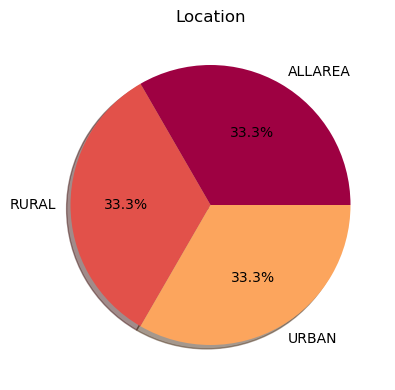

In [21]:
location=india1_1.groupby('Location' ).agg('count')
labels = location.Value.sort_values().index
counts = location.Value.sort_values()
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Location')
type_show_ids = plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


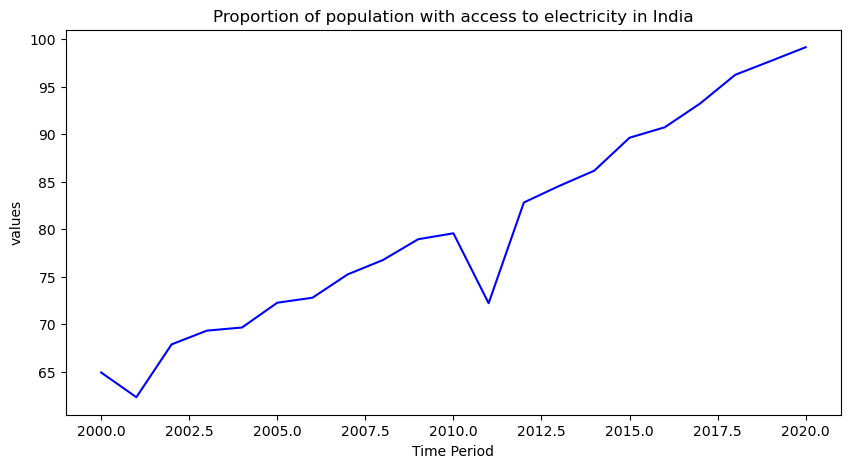

In [22]:
plt.figure(figsize=(10,5))
plt.plot(data11_mean['TimePeriod'],data11_mean['Value'],c='blue')
plt.title("Proportion of population with access to electricity in India")
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()

Inference from the above graph : The proportion of people with access to electricity in INDIA is increased over the years

# During Covid - Proportion of population with access to electricity in India:

In [23]:
india1_1= data_1_1[(data_1_1.GeoAreaName=="India")&(data_1_1.TimePeriod==2020)]
data11_group= india1_1.groupby("TimePeriod")
data11_mean= data11_group.mean()
data11_mean= data11_mean.reset_index()
data11_mean.head()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\773753547.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data11_mean= data11_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
0,2020,7.1,356.0,99.15443,2020.0


# Proportion of population with access to electricity in the world


In [72]:
world1_1= data_1_1[(data_1_1.GeoAreaName=="Afghanistan") |
    (data_1_1.GeoAreaName=="Albania") |
    (data_1_1.GeoAreaName=="Algeria") |
    (data_1_1.GeoAreaName=="American Samoa") |
    (data_1_1.GeoAreaName=="Andorra") |
    (data_1_1.GeoAreaName=="Angola") |
    (data_1_1.GeoAreaName=="Antigua and Barbuda") |
    (data_1_1.GeoAreaName=="Azerbaijan") |
    (data_1_1.GeoAreaName=="Argentina") |
    (data_1_1.GeoAreaName=="Australia") |
    (data_1_1.GeoAreaName=="Austria") |
    (data_1_1.GeoAreaName=="Bahamas") |
    (data_1_1.GeoAreaName=="Bahrain") |
    (data_1_1.GeoAreaName=="Bangladesh") |
    (data_1_1.GeoAreaName=="Armenia") |
    (data_1_1.GeoAreaName=="Barbados") |
    (data_1_1.GeoAreaName=="Belgium") |
    (data_1_1.GeoAreaName=="Bermuda") |
    (data_1_1.GeoAreaName=="Bhutan") |
    (data_1_1.GeoAreaName=="Bolivia (Plurinational State of)") |
    (data_1_1.GeoAreaName=="Bosnia and Herzegovina") |
    (data_1_1.GeoAreaName=="Botswana") |
    (data_1_1.GeoAreaName=="Brazil") |
    (data_1_1.GeoAreaName=="Belize") |
    (data_1_1.GeoAreaName=="Solomon Islands") |
    (data_1_1.GeoAreaName=="British Virgin Islands") |
    (data_1_1.GeoAreaName=="Brunei Darussalam") |
    (data_1_1.GeoAreaName=="Bulgaria") |
    (data_1_1.GeoAreaName=="Myanmar") |
    (data_1_1.GeoAreaName=="Burundi") |
    (data_1_1.GeoAreaName=="Belarus") |
    (data_1_1.GeoAreaName=="Cambodia") |
    (data_1_1.GeoAreaName=="Cameroon") |
    (data_1_1.GeoAreaName=="Canada") |
    (data_1_1.GeoAreaName=="Cabo Verde") |
    (data_1_1.GeoAreaName=="Cayman Islands") |
    (data_1_1.GeoAreaName=="Central African Republic") |
    (data_1_1.GeoAreaName=="Sri Lanka") |
    (data_1_1.GeoAreaName=="Chad") |
    (data_1_1.GeoAreaName=="Chile") |
    (data_1_1.GeoAreaName=="China") |
    (data_1_1.GeoAreaName=="Colombia") |
    (data_1_1.GeoAreaName=="Comoros") |
    (data_1_1.GeoAreaName=="Congo") |
    (data_1_1.GeoAreaName=="Democratic Republic of the Congo") |
    (data_1_1.GeoAreaName=="Cook Islands") |
    (data_1_1.GeoAreaName=="Costa Rica") |
    (data_1_1.GeoAreaName=="Croatia") |
    (data_1_1.GeoAreaName=="Cuba") |
    (data_1_1.GeoAreaName=="Cyprus") |
    (data_1_1.GeoAreaName=="Czechia") |
    (data_1_1.GeoAreaName=="Benin") |
    (data_1_1.GeoAreaName=="Denmark") |
    (data_1_1.GeoAreaName=="Dominica") |
    (data_1_1.GeoAreaName=="Dominican Republic") |
    (data_1_1.GeoAreaName=="Ecuador") |
    (data_1_1.GeoAreaName=="El Salvador") |
    (data_1_1.GeoAreaName=="Equatorial Guinea") |
    (data_1_1.GeoAreaName=="Ethiopia") |
    (data_1_1.GeoAreaName=="Eritrea") |
    (data_1_1.GeoAreaName=="Estonia") |
    (data_1_1.GeoAreaName=="Faroe Islands") |
    (data_1_1.GeoAreaName=="Fiji") |
    (data_1_1.GeoAreaName=="Finland") |
    (data_1_1.GeoAreaName=="France") |
    (data_1_1.GeoAreaName=="French Polynesia") |
    (data_1_1.GeoAreaName=="Djibouti") |
    (data_1_1.GeoAreaName=="Gabon") |
    (data_1_1.GeoAreaName=="Georgia") |
    (data_1_1.GeoAreaName=="Gambia") |
    (data_1_1.GeoAreaName=="State of Palestine") |
    (data_1_1.GeoAreaName=="Germany") |
    (data_1_1.GeoAreaName=="Ghana") |
    (data_1_1.GeoAreaName=="Gibraltar") |
    (data_1_1.GeoAreaName=="Kiribati") |
    (data_1_1.GeoAreaName=="Greece") |
    (data_1_1.GeoAreaName=="Greenland") |
    (data_1_1.GeoAreaName=="Grenada") |
    (data_1_1.GeoAreaName=="Guam") |
    (data_1_1.GeoAreaName=="Guatemala") |
    (data_1_1.GeoAreaName=="Guinea") |
    (data_1_1.GeoAreaName=="Guyana") |
    (data_1_1.GeoAreaName=="Haiti") |
    (data_1_1.GeoAreaName=="Honduras") |
    (data_1_1.GeoAreaName=="China, Hong Kong Special Administrative Region") |
    (data_1_1.GeoAreaName=="Hungary") |
    (data_1_1.GeoAreaName=="Iceland") |
    (data_1_1.GeoAreaName=="India") |
    (data_1_1.GeoAreaName=="Indonesia") |
    (data_1_1.GeoAreaName=="Iran (Islamic Republic of)") |
    (data_1_1.GeoAreaName=="Iraq") |
    (data_1_1.GeoAreaName=="Ireland") |
    (data_1_1.GeoAreaName=="Israel") |
    (data_1_1.GeoAreaName=="Italy") |
    (data_1_1.GeoAreaName=="Côte d'Ivoire") |
    (data_1_1.GeoAreaName=="Jamaica") |
    (data_1_1.GeoAreaName=="Japan") |
    (data_1_1.GeoAreaName=="Kazakhstan") |
    (data_1_1.GeoAreaName=="Jordan") |
    (data_1_1.GeoAreaName=="Kenya") |
    (data_1_1.GeoAreaName=="Democratic People's Republic of Korea") |
    (data_1_1.GeoAreaName=="Republic of Korea") |
    (data_1_1.GeoAreaName=="Kuwait") |
    (data_1_1.GeoAreaName=="Kyrgyzstan") |
    (data_1_1.GeoAreaName=="Lao People's Democratic Republic") |
    (data_1_1.GeoAreaName=="Lebanon") |
    (data_1_1.GeoAreaName=="Lesotho") |
    (data_1_1.GeoAreaName=="Latvia") |
    (data_1_1.GeoAreaName=="Liberia") |
    (data_1_1.GeoAreaName=="Libya") |
    (data_1_1.GeoAreaName=="Liechtenstein") |
    (data_1_1.GeoAreaName=="Lithuania") |
    (data_1_1.GeoAreaName=="Luxembourg") |
    (data_1_1.GeoAreaName=="China, Macao Special Administrative Region") |
    (data_1_1.GeoAreaName=="Madagascar") |
    (data_1_1.GeoAreaName=="Malawi") |
    (data_1_1.GeoAreaName=="Malaysia") |
    (data_1_1.GeoAreaName=="Maldives") |
    (data_1_1.GeoAreaName=="Mali") |
    (data_1_1.GeoAreaName=="Malta") |
    (data_1_1.GeoAreaName=="Mauritania") |
    (data_1_1.GeoAreaName=="Mauritius") |
    (data_1_1.GeoAreaName=="Mexico") |
    (data_1_1.GeoAreaName=="Monaco") |
    (data_1_1.GeoAreaName=="Mongolia") |
    (data_1_1.GeoAreaName=="Republic of Moldova") |
    (data_1_1.GeoAreaName=="Montenegro") |
    (data_1_1.GeoAreaName=="Morocco") |
    (data_1_1.GeoAreaName=="Mozambique") |
    (data_1_1.GeoAreaName=="Oman") |
    (data_1_1.GeoAreaName=="Namibia") |
    (data_1_1.GeoAreaName=="Nauru") |
    (data_1_1.GeoAreaName=="Nepal") |
    (data_1_1.GeoAreaName=="Netherlands") |
    (data_1_1.GeoAreaName=="Curaçao") |
    (data_1_1.GeoAreaName=="Aruba") |
    (data_1_1.GeoAreaName=="Sint Maarten (Dutch part)") |
    (data_1_1.GeoAreaName=="New Caledonia") |
    (data_1_1.GeoAreaName=="Vanuatu") |
    (data_1_1.GeoAreaName=="New Zealand") |
    (data_1_1.GeoAreaName=="Nicaragua") |
    (data_1_1.GeoAreaName=="Niger") |
    (data_1_1.GeoAreaName=="Nigeria") |
    (data_1_1.GeoAreaName=="Niue") |
    (data_1_1.GeoAreaName=="Norway") |
    (data_1_1.GeoAreaName=="Northern Mariana Islands") |
    (data_1_1.GeoAreaName=="Micronesia (Federated States of)") |
    (data_1_1.GeoAreaName=="Marshall Islands") |
    (data_1_1.GeoAreaName=="Palau") |
    (data_1_1.GeoAreaName=="Pakistan") |
    (data_1_1.GeoAreaName=="Panama") |
    (data_1_1.GeoAreaName=="Papua New Guinea") |
    (data_1_1.GeoAreaName=="Paraguay") |
    (data_1_1.GeoAreaName=="Peru") |
    (data_1_1.GeoAreaName=="Philippines") |
    (data_1_1.GeoAreaName=="Poland") |
    (data_1_1.GeoAreaName=="Portugal") |
    (data_1_1.GeoAreaName=="Guinea-Bissau") |
    (data_1_1.GeoAreaName=="Timor-Leste") |
    (data_1_1.GeoAreaName=="Puerto Rico") |
    (data_1_1.GeoAreaName=="Qatar") |
    (data_1_1.GeoAreaName=="Romania") |
    (data_1_1.GeoAreaName=="Russian Federation") |
    (data_1_1.GeoAreaName=="Rwanda") |
    (data_1_1.GeoAreaName=="Saint Kitts and Nevis") |
    (data_1_1.GeoAreaName=="Anguilla") |
    (data_1_1.GeoAreaName=="Saint Lucia") |
    (data_1_1.GeoAreaName=="Saint Martin (French Part)") |
    (data_1_1.GeoAreaName=="Saint Vincent and the Grenadines") |
    (data_1_1.GeoAreaName=="San Marino") |
    (data_1_1.GeoAreaName=="Sao Tome and Principe") |
    (data_1_1.GeoAreaName=="Saudi Arabia") |
    (data_1_1.GeoAreaName=="Senegal") |
    (data_1_1.GeoAreaName=="Serbia") |
    (data_1_1.GeoAreaName=="Seychelles") |
    (data_1_1.GeoAreaName=="Sierra Leone") |
    (data_1_1.GeoAreaName=="Singapore") |
    (data_1_1.GeoAreaName=="Slovakia") |
    (data_1_1.GeoAreaName=="Viet Nam") |
    (data_1_1.GeoAreaName=="Slovenia") |
    (data_1_1.GeoAreaName=="Somalia") |
    (data_1_1.GeoAreaName=="South Africa") |
    (data_1_1.GeoAreaName=="Zimbabwe") |
    (data_1_1.GeoAreaName=="Spain") |
    (data_1_1.GeoAreaName=="South Sudan") |
    (data_1_1.GeoAreaName=="Sudan") |
    (data_1_1.GeoAreaName=="Suriname") |
    (data_1_1.GeoAreaName=="Eswatini") |
    (data_1_1.GeoAreaName=="Sweden") |
    (data_1_1.GeoAreaName=="Switzerland") |
    (data_1_1.GeoAreaName=="Syrian Arab Republic") |
    (data_1_1.GeoAreaName=="Tajikistan") |
    (data_1_1.GeoAreaName=="Thailand") |
    (data_1_1.GeoAreaName=="Togo") |
    (data_1_1.GeoAreaName=="Tonga") |
    (data_1_1.GeoAreaName=="Trinidad and Tobago") |
    (data_1_1.GeoAreaName=="United Arab Emirates") |
    (data_1_1.GeoAreaName=="Tunisia") |
    (data_1_1.GeoAreaName=="Türkiye") |
    (data_1_1.GeoAreaName=="Turkmenistan") |
    (data_1_1.GeoAreaName=="Turks and Caicos Islands") |
    (data_1_1.GeoAreaName=="Tuvalu") |
    (data_1_1.GeoAreaName=="Uganda") |
    (data_1_1.GeoAreaName=="Ukraine") |
    (data_1_1.GeoAreaName=="North Macedonia") |
    (data_1_1.GeoAreaName=="Egypt") |
    (data_1_1.GeoAreaName=="United Kingdom of Great Britain and Northern Ireland") |
    (data_1_1.GeoAreaName=="Isle of Man") |
    (data_1_1.GeoAreaName=="United Republic of Tanzania") |
    (data_1_1.GeoAreaName=="United States of America") |
    (data_1_1.GeoAreaName=="United States Virgin Islands") |
    (data_1_1.GeoAreaName=="Burkina Faso") |
    (data_1_1.GeoAreaName=="Uruguay") |
    (data_1_1.GeoAreaName=="Uzbekistan") |
    (data_1_1.GeoAreaName=="Venezuela (Bolivarian Republic of)") |
    (data_1_1.GeoAreaName=="Samoa") |
    (data_1_1.GeoAreaName=="Yemen") |
    (data_1_1.GeoAreaName=="Zambia") |
    (data_1_1.GeoAreaName=="Mayotte") |
    (data_1_1.GeoAreaName=="Falkland Islands (Malvinas)") |
    (data_1_1.GeoAreaName=="French Guiana") |
    (data_1_1.GeoAreaName=="Guadeloupe") |
    (data_1_1.GeoAreaName=="Kosovo") |
    (data_1_1.GeoAreaName=="Martinique") |
    (data_1_1.GeoAreaName=="Montserrat") |
    (data_1_1.GeoAreaName=="Bonaire, Sint Eustatius and Saba") |
    (data_1_1.GeoAreaName=="Réunion") |
    (data_1_1.GeoAreaName=="Saint Helena") |
    (data_1_1.GeoAreaName=="Saint Pierre and Miquelon") |
    (data_1_1.GeoAreaName=="Guernsey") |
    (data_1_1.GeoAreaName=="Jersey") |
    (data_1_1.GeoAreaName=="Wallis and Futuna Islands")]
data_11_group= world1_1.groupby("TimePeriod")
data_11_mean= data_11_group.mean()
data_11_mean= data_11_mean.reset_index()
data_11_mean.tail()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2359765800.py:234: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_11_mean= data_11_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
16,2016,7.1,432.568807,83.327344,2016.0
17,2017,7.1,432.568807,83.655375,2017.0
18,2018,7.1,432.568807,83.611789,2018.0
19,2019,7.1,432.568807,84.308525,2019.0
20,2020,7.1,432.568807,85.816979,2020.0


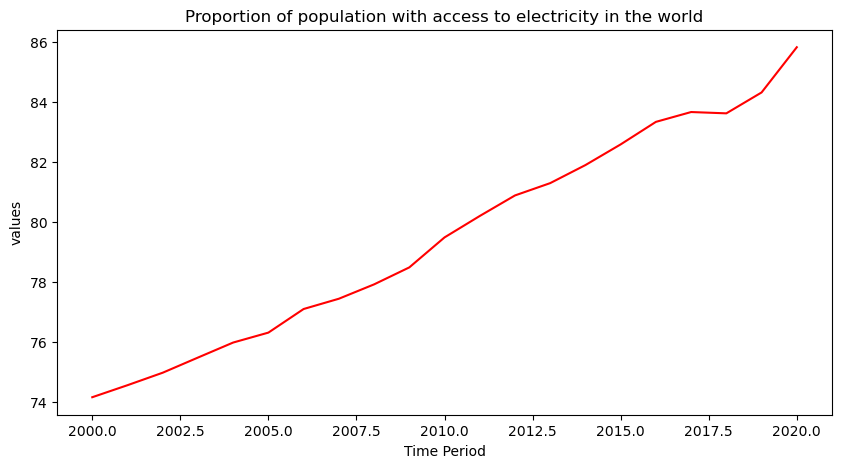

In [26]:
plt.figure(figsize=(10,5))
plt.plot(data_11_mean['TimePeriod'],data_11_mean['Value'],c='red')
plt.title("Proportion of population with access to electricity in the world")
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()


# During Covid -  Proportion of population with access to electricity in the world


In [27]:
world1_1= data_1_1[((data_1_1.GeoAreaName=="Afghanistan") |
    (data_1_1.GeoAreaName=="Albania") |
    (data_1_1.GeoAreaName=="Algeria") |
    (data_1_1.GeoAreaName=="American Samoa") |
    (data_1_1.GeoAreaName=="Andorra") |
    (data_1_1.GeoAreaName=="Angola") |
    (data_1_1.GeoAreaName=="Antigua and Barbuda") |
    (data_1_1.GeoAreaName=="Azerbaijan") |
    (data_1_1.GeoAreaName=="Argentina") |
    (data_1_1.GeoAreaName=="Australia") |
    (data_1_1.GeoAreaName=="Austria") |
    (data_1_1.GeoAreaName=="Bahamas") |
    (data_1_1.GeoAreaName=="Bahrain") |
    (data_1_1.GeoAreaName=="Bangladesh") |
    (data_1_1.GeoAreaName=="Armenia") |
    (data_1_1.GeoAreaName=="Barbados") |
    (data_1_1.GeoAreaName=="Belgium") |
    (data_1_1.GeoAreaName=="Bermuda") |
    (data_1_1.GeoAreaName=="Bhutan") |
    (data_1_1.GeoAreaName=="Bolivia (Plurinational State of)") |
    (data_1_1.GeoAreaName=="Bosnia and Herzegovina") |
    (data_1_1.GeoAreaName=="Botswana") |
    (data_1_1.GeoAreaName=="Brazil") |
    (data_1_1.GeoAreaName=="Belize") |
    (data_1_1.GeoAreaName=="Solomon Islands") |
    (data_1_1.GeoAreaName=="British Virgin Islands") |
    (data_1_1.GeoAreaName=="Brunei Darussalam") |
    (data_1_1.GeoAreaName=="Bulgaria") |
    (data_1_1.GeoAreaName=="Myanmar") |
    (data_1_1.GeoAreaName=="Burundi") |
    (data_1_1.GeoAreaName=="Belarus") |
    (data_1_1.GeoAreaName=="Cambodia") |
    (data_1_1.GeoAreaName=="Cameroon") |
    (data_1_1.GeoAreaName=="Canada") |
    (data_1_1.GeoAreaName=="Cabo Verde") |
    (data_1_1.GeoAreaName=="Cayman Islands") |
    (data_1_1.GeoAreaName=="Central African Republic") |
    (data_1_1.GeoAreaName=="Sri Lanka") |
    (data_1_1.GeoAreaName=="Chad") |
    (data_1_1.GeoAreaName=="Chile") |
    (data_1_1.GeoAreaName=="China") |
    (data_1_1.GeoAreaName=="Colombia") |
    (data_1_1.GeoAreaName=="Comoros") |
    (data_1_1.GeoAreaName=="Congo") |
    (data_1_1.GeoAreaName=="Democratic Republic of the Congo") |
    (data_1_1.GeoAreaName=="Cook Islands") |
    (data_1_1.GeoAreaName=="Costa Rica") |
    (data_1_1.GeoAreaName=="Croatia") |
    (data_1_1.GeoAreaName=="Cuba") |
    (data_1_1.GeoAreaName=="Cyprus") |
    (data_1_1.GeoAreaName=="Czechia") |
    (data_1_1.GeoAreaName=="Benin") |
    (data_1_1.GeoAreaName=="Denmark") |
    (data_1_1.GeoAreaName=="Dominica") |
    (data_1_1.GeoAreaName=="Dominican Republic") |
    (data_1_1.GeoAreaName=="Ecuador") |
    (data_1_1.GeoAreaName=="El Salvador") |
    (data_1_1.GeoAreaName=="Equatorial Guinea") |
    (data_1_1.GeoAreaName=="Ethiopia") |
    (data_1_1.GeoAreaName=="Eritrea") |
    (data_1_1.GeoAreaName=="Estonia") |
    (data_1_1.GeoAreaName=="Faroe Islands") |
    (data_1_1.GeoAreaName=="Fiji") |
    (data_1_1.GeoAreaName=="Finland") |
    (data_1_1.GeoAreaName=="France") |
    (data_1_1.GeoAreaName=="French Polynesia") |
    (data_1_1.GeoAreaName=="Djibouti") |
    (data_1_1.GeoAreaName=="Gabon") |
    (data_1_1.GeoAreaName=="Georgia") |
    (data_1_1.GeoAreaName=="Gambia") |
    (data_1_1.GeoAreaName=="State of Palestine") |
    (data_1_1.GeoAreaName=="Germany") |
    (data_1_1.GeoAreaName=="Ghana") |
    (data_1_1.GeoAreaName=="Gibraltar") |
    (data_1_1.GeoAreaName=="Kiribati") |
    (data_1_1.GeoAreaName=="Greece") |
    (data_1_1.GeoAreaName=="Greenland") |
    (data_1_1.GeoAreaName=="Grenada") |
    (data_1_1.GeoAreaName=="Guam") |
    (data_1_1.GeoAreaName=="Guatemala") |
    (data_1_1.GeoAreaName=="Guinea") |
    (data_1_1.GeoAreaName=="Guyana") |
    (data_1_1.GeoAreaName=="Haiti") |
    (data_1_1.GeoAreaName=="Honduras") |
    (data_1_1.GeoAreaName=="China, Hong Kong Special Administrative Region") |
    (data_1_1.GeoAreaName=="Hungary") |
    (data_1_1.GeoAreaName=="Iceland") |
    (data_1_1.GeoAreaName=="India") |
    (data_1_1.GeoAreaName=="Indonesia") |
    (data_1_1.GeoAreaName=="Iran (Islamic Republic of)") |
    (data_1_1.GeoAreaName=="Iraq") |
    (data_1_1.GeoAreaName=="Ireland") |
    (data_1_1.GeoAreaName=="Israel") |
    (data_1_1.GeoAreaName=="Italy") |
    (data_1_1.GeoAreaName=="Côte d'Ivoire") |
    (data_1_1.GeoAreaName=="Jamaica") |
    (data_1_1.GeoAreaName=="Japan") |
    (data_1_1.GeoAreaName=="Kazakhstan") |
    (data_1_1.GeoAreaName=="Jordan") |
    (data_1_1.GeoAreaName=="Kenya") |
    (data_1_1.GeoAreaName=="Democratic People's Republic of Korea") |
    (data_1_1.GeoAreaName=="Republic of Korea") |
    (data_1_1.GeoAreaName=="Kuwait") |
    (data_1_1.GeoAreaName=="Kyrgyzstan") |
    (data_1_1.GeoAreaName=="Lao People's Democratic Republic") |
    (data_1_1.GeoAreaName=="Lebanon") |
    (data_1_1.GeoAreaName=="Lesotho") |
    (data_1_1.GeoAreaName=="Latvia") |
    (data_1_1.GeoAreaName=="Liberia") |
    (data_1_1.GeoAreaName=="Libya") |
    (data_1_1.GeoAreaName=="Liechtenstein") |
    (data_1_1.GeoAreaName=="Lithuania") |
    (data_1_1.GeoAreaName=="Luxembourg") |
    (data_1_1.GeoAreaName=="China, Macao Special Administrative Region") |
    (data_1_1.GeoAreaName=="Madagascar") |
    (data_1_1.GeoAreaName=="Malawi") |
    (data_1_1.GeoAreaName=="Malaysia") |
    (data_1_1.GeoAreaName=="Maldives") |
    (data_1_1.GeoAreaName=="Mali") |
    (data_1_1.GeoAreaName=="Malta") |
    (data_1_1.GeoAreaName=="Mauritania") |
    (data_1_1.GeoAreaName=="Mauritius") |
    (data_1_1.GeoAreaName=="Mexico") |
    (data_1_1.GeoAreaName=="Monaco") |
    (data_1_1.GeoAreaName=="Mongolia") |
    (data_1_1.GeoAreaName=="Republic of Moldova") |
    (data_1_1.GeoAreaName=="Montenegro") |
    (data_1_1.GeoAreaName=="Morocco") |
    (data_1_1.GeoAreaName=="Mozambique") |
    (data_1_1.GeoAreaName=="Oman") |
    (data_1_1.GeoAreaName=="Namibia") |
    (data_1_1.GeoAreaName=="Nauru") |
    (data_1_1.GeoAreaName=="Nepal") |
    (data_1_1.GeoAreaName=="Netherlands") |
    (data_1_1.GeoAreaName=="Curaçao") |
    (data_1_1.GeoAreaName=="Aruba") |
    (data_1_1.GeoAreaName=="Sint Maarten (Dutch part)") |
    (data_1_1.GeoAreaName=="New Caledonia") |
    (data_1_1.GeoAreaName=="Vanuatu") |
    (data_1_1.GeoAreaName=="New Zealand") |
    (data_1_1.GeoAreaName=="Nicaragua") |
    (data_1_1.GeoAreaName=="Niger") |
    (data_1_1.GeoAreaName=="Nigeria") |
    (data_1_1.GeoAreaName=="Niue") |
    (data_1_1.GeoAreaName=="Norway") |
    (data_1_1.GeoAreaName=="Northern Mariana Islands") |
    (data_1_1.GeoAreaName=="Micronesia (Federated States of)") |
    (data_1_1.GeoAreaName=="Marshall Islands") |
    (data_1_1.GeoAreaName=="Palau") |
    (data_1_1.GeoAreaName=="Pakistan") |
    (data_1_1.GeoAreaName=="Panama") |
    (data_1_1.GeoAreaName=="Papua New Guinea") |
    (data_1_1.GeoAreaName=="Paraguay") |
    (data_1_1.GeoAreaName=="Peru") |
    (data_1_1.GeoAreaName=="Philippines") |
    (data_1_1.GeoAreaName=="Poland") |
    (data_1_1.GeoAreaName=="Portugal") |
    (data_1_1.GeoAreaName=="Guinea-Bissau") |
    (data_1_1.GeoAreaName=="Timor-Leste") |
    (data_1_1.GeoAreaName=="Puerto Rico") |
    (data_1_1.GeoAreaName=="Qatar") |
    (data_1_1.GeoAreaName=="Romania") |
    (data_1_1.GeoAreaName=="Russian Federation") |
    (data_1_1.GeoAreaName=="Rwanda") |
    (data_1_1.GeoAreaName=="Saint Kitts and Nevis") |
    (data_1_1.GeoAreaName=="Anguilla") |
    (data_1_1.GeoAreaName=="Saint Lucia") |
    (data_1_1.GeoAreaName=="Saint Martin (French Part)") |
    (data_1_1.GeoAreaName=="Saint Vincent and the Grenadines") |
    (data_1_1.GeoAreaName=="San Marino") |
    (data_1_1.GeoAreaName=="Sao Tome and Principe") |
    (data_1_1.GeoAreaName=="Saudi Arabia") |
    (data_1_1.GeoAreaName=="Senegal") |
    (data_1_1.GeoAreaName=="Serbia") |
    (data_1_1.GeoAreaName=="Seychelles") |
    (data_1_1.GeoAreaName=="Sierra Leone") |
    (data_1_1.GeoAreaName=="Singapore") |
    (data_1_1.GeoAreaName=="Slovakia") |
    (data_1_1.GeoAreaName=="Viet Nam") |
    (data_1_1.GeoAreaName=="Slovenia") |
    (data_1_1.GeoAreaName=="Somalia") |
    (data_1_1.GeoAreaName=="South Africa") |
    (data_1_1.GeoAreaName=="Zimbabwe") |
    (data_1_1.GeoAreaName=="Spain") |
    (data_1_1.GeoAreaName=="South Sudan") |
    (data_1_1.GeoAreaName=="Sudan") |
    (data_1_1.GeoAreaName=="Suriname") |
    (data_1_1.GeoAreaName=="Eswatini") |
    (data_1_1.GeoAreaName=="Sweden") |
    (data_1_1.GeoAreaName=="Switzerland") |
    (data_1_1.GeoAreaName=="Syrian Arab Republic") |
    (data_1_1.GeoAreaName=="Tajikistan") |
    (data_1_1.GeoAreaName=="Thailand") |
    (data_1_1.GeoAreaName=="Togo") |
    (data_1_1.GeoAreaName=="Tonga") |
    (data_1_1.GeoAreaName=="Trinidad and Tobago") |
    (data_1_1.GeoAreaName=="United Arab Emirates") |
    (data_1_1.GeoAreaName=="Tunisia") |
    (data_1_1.GeoAreaName=="Türkiye") |
    (data_1_1.GeoAreaName=="Turkmenistan") |
    (data_1_1.GeoAreaName=="Turks and Caicos Islands") |
    (data_1_1.GeoAreaName=="Tuvalu") |
    (data_1_1.GeoAreaName=="Uganda") |
    (data_1_1.GeoAreaName=="Ukraine") |
    (data_1_1.GeoAreaName=="North Macedonia") |
    (data_1_1.GeoAreaName=="Egypt") |
    (data_1_1.GeoAreaName=="United Kingdom of Great Britain and Northern Ireland") |
    (data_1_1.GeoAreaName=="Isle of Man") |
    (data_1_1.GeoAreaName=="United Republic of Tanzania") |
    (data_1_1.GeoAreaName=="United States of America") |
    (data_1_1.GeoAreaName=="United States Virgin Islands") |
    (data_1_1.GeoAreaName=="Burkina Faso") |
    (data_1_1.GeoAreaName=="Uruguay") |
    (data_1_1.GeoAreaName=="Uzbekistan") |
    (data_1_1.GeoAreaName=="Venezuela (Bolivarian Republic of)") |
    (data_1_1.GeoAreaName=="Samoa") |
    (data_1_1.GeoAreaName=="Yemen") |
    (data_1_1.GeoAreaName=="Zambia") |
    (data_1_1.GeoAreaName=="Mayotte") |
    (data_1_1.GeoAreaName=="Falkland Islands (Malvinas)") |
    (data_1_1.GeoAreaName=="French Guiana") |
    (data_1_1.GeoAreaName=="Guadeloupe") |
    (data_1_1.GeoAreaName=="Kosovo") |
    (data_1_1.GeoAreaName=="Martinique") |
    (data_1_1.GeoAreaName=="Montserrat") |
    (data_1_1.GeoAreaName=="Bonaire, Sint Eustatius and Saba") |
    (data_1_1.GeoAreaName=="Réunion") |
    (data_1_1.GeoAreaName=="Saint Helena") |
    (data_1_1.GeoAreaName=="Saint Pierre and Miquelon") |
    (data_1_1.GeoAreaName=="Guernsey") |
    (data_1_1.GeoAreaName=="Jersey") |
    (data_1_1.GeoAreaName=="Wallis and Futuna Islands"))&(data_1_1.TimePeriod==2020)]
data_11_group= world1_1.groupby("TimePeriod")
data_11_mean= data_11_group.mean()
data_11_mean= data_11_mean.reset_index()
data_11_mean.head()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\946543253.py:234: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_11_mean= data_11_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
0,2020,7.1,432.568807,85.816979,2020.0


# INDIA VS WORLD:


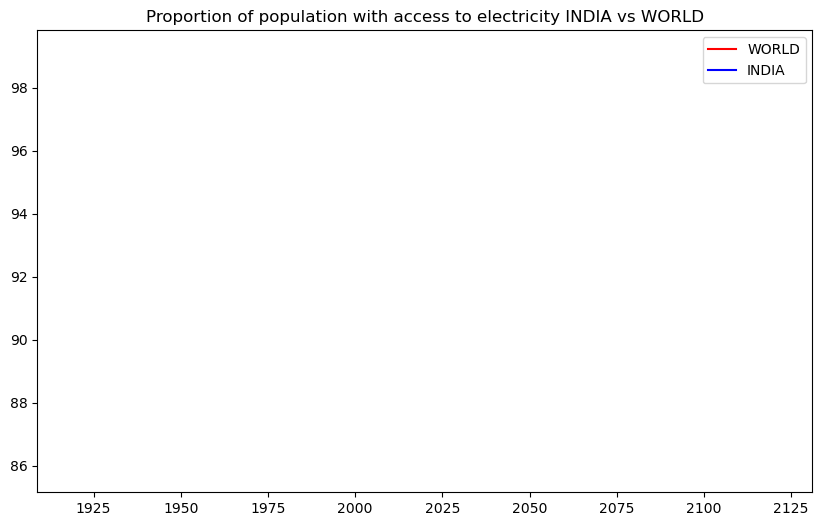

In [28]:
plt.figure(figsize=(10,6))
plt.plot(data_11_mean['TimePeriod'],data_11_mean['Value'], c='red',label='WORLD') #WORLD
plt.plot(data11_mean['TimePeriod'],data11_mean['Value'], c='blue',label='INDIA') #INDIA
plt.title("Proportion of population with access to electricity INDIA vs WORLD")
plt.legend()
plt.show()


# Proportion of population with access to electricity in the United States of America


In [29]:
world1_1= data_1_1[(data_1_1.GeoAreaName=="United States of America")]
data_11_group= world1_1.groupby("TimePeriod")
data_11_mean= data_11_group.mean()
data_11_mean= data_11_mean.reset_index()
data_11_mean.head()


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\4209267198.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_11_mean= data_11_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
0,2000,7.1,840.0,100.0,2000.0
1,2001,7.1,840.0,100.0,2001.0
2,2002,7.1,840.0,100.0,2002.0
3,2003,7.1,840.0,100.0,2003.0
4,2004,7.1,840.0,100.0,2004.0


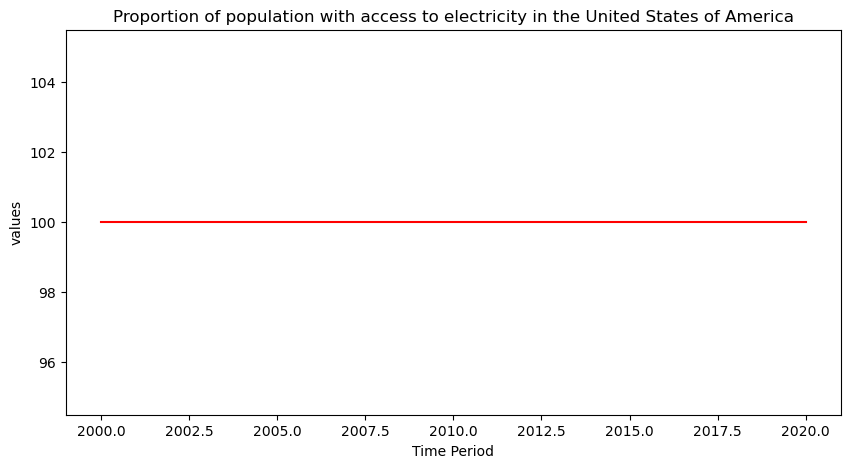

In [30]:
plt.figure(figsize=(10,5))
plt.plot(data_11_mean['TimePeriod'],data_11_mean['Value'],c='red')
plt.title("Proportion of population with access to electricity in the United States of America")
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()


In [31]:
world1_1= data_1_1[(data_1_1.GeoAreaName=="United States of America")|(data_1_1.GeoAreaName=="Afghanistan")]
data_11_group= world1_1.groupby("TimePeriod")
data_11_mean= data_11_group.mean()
data_11_mean= data_11_mean.reset_index()
data_11_mean.head()


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\936452090.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_11_mean= data_11_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
0,2000,7.1,422.0,62.291177,2000.0
1,2001,7.1,422.0,62.945602,2001.0
2,2002,7.1,422.0,64.078740,2002.0
3,2003,7.1,422.0,65.211940,2003.0
4,2004,7.1,422.0,66.886855,2004.0


# Proportion of population with access to electricity


In [32]:
con1=data_1_1.groupby("GeoAreaName")
con1=con1.mean()
con1.head()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2032151950.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  con1=con1.mean()


,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
Afghanistan,7.1,4.0,2010.0,61.397903,2010.0
Albania,7.1,8.0,2010.0,99.992222,2010.0
Algeria,7.1,12.0,2010.0,98.934500,2010.0
American Samoa,7.1,16.0,2010.0,0.000000,2010.0
Andorra,7.1,20.0,2010.0,100.000000,2010.0


In [33]:
#TOP 5 COUNTRIES
top_5=con1.sort_values("Value", ascending=False)
top_5.head(5)

,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
Latvia,7.1,428.0,2010.0,100.0,2010.0
Sweden,7.1,752.0,2010.0,100.0,2010.0
Ireland,7.1,372.0,2010.0,100.0,2010.0
Iceland,7.1,352.0,2010.0,100.0,2010.0
Hungary,7.1,348.0,2010.0,100.0,2010.0


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2855263269.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Latvia= Latvia.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2855263269.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sweden= Sweden.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2855263269.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Ireland= Ireland.mean()
C:\Users\dhi

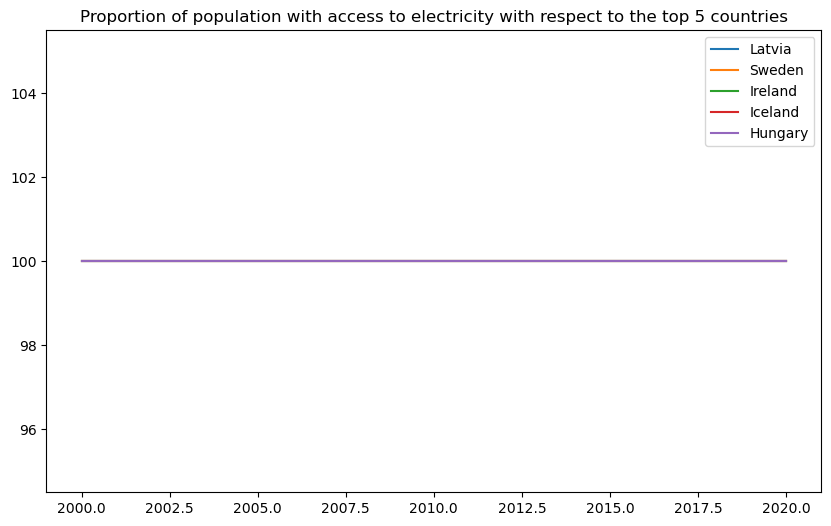

In [34]:
#TOP 5 COUNTRIES

Latvia= data_1_1[(data_1_1.GeoAreaName=="Latvia")]
Latvia= Latvia.groupby("TimePeriod")
Latvia= Latvia.mean()
Latvia= Latvia.reset_index()


Sweden= data_1_1[(data_1_1.GeoAreaName=="Sweden")]
Sweden= Sweden.groupby("TimePeriod")
Sweden= Sweden.mean()
Sweden= Sweden.reset_index()


Ireland= data_1_1[(data_1_1.GeoAreaName=="Ireland")]
Ireland= Ireland.groupby("TimePeriod")
Ireland= Ireland.mean()
Ireland= Ireland.reset_index()

Iceland= data_1_1[(data_1_1.GeoAreaName=="Iceland")]
Iceland= Iceland.groupby("TimePeriod")
Iceland= Iceland.mean()
Iceland= Iceland.reset_index()

Hungary= data_1_1[(data_1_1.GeoAreaName=="Hungary")]
Hungary= Hungary.groupby("TimePeriod")
Hungary= Hungary.mean()
Hungary= Hungary.reset_index()

top10=['Latvia','Sweden','Ireland','Iceland','Hungary']
plt.figure(figsize=(10,6))
plt.plot(Latvia['TimePeriod'],Latvia['Value'], label ='Latvia')
plt.plot(Sweden['TimePeriod'],Sweden['Value'], label ='Sweden')
plt.plot(Ireland['TimePeriod'],Ireland['Value'], label ='Ireland')
plt.plot(Iceland['TimePeriod'],Iceland['Value'], label ='Iceland')
plt.plot(Hungary['TimePeriod'],Hungary['Value'], label ='Hungary')


plt.legend()
plt.title("Proportion of population with access to electricity with respect to the top 5 countries")
plt.show()


In [35]:
#Bottom 5 COUNTRIES
bottom_5=con1.sort_values("Value", ascending=True)
bottom_5.head(5)

,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
American Samoa,7.1,16.0,2010.0,0.000000,2010.0
South Sudan,7.1,728.0,2010.0,4.833675,2010.0
Liberia,7.1,430.0,2010.0,8.288004,2010.0
Chad,7.1,148.0,2010.0,10.568121,2010.0
Central African Republic,7.1,140.0,2010.0,11.579430,2010.0


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2632588837.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AmericanSamoa=AmericanSamoa.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2632588837.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  South_Sudan=South_Sudan.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2632588837.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Liberia=Liberi

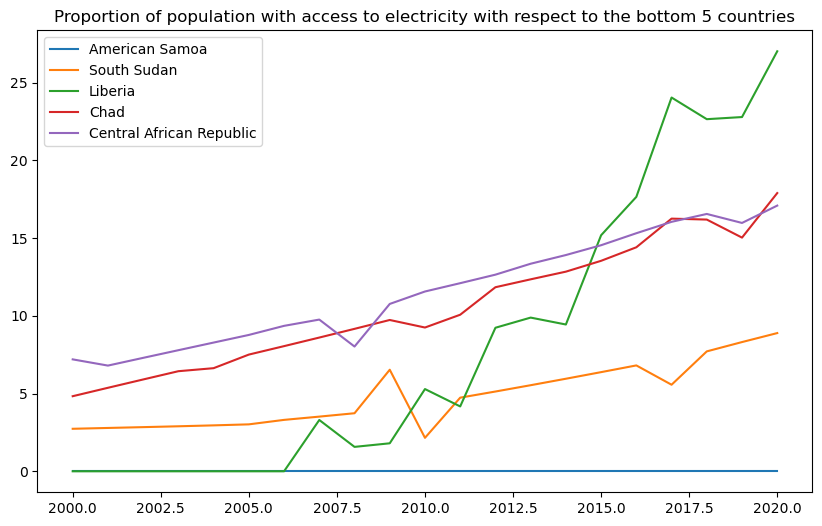

In [36]:
#TOP 5 COUNTRIES

#American Samoa
AmericanSamoa= data_1_1[(data_1_1.GeoAreaName=="American Samoa")]
AmericanSamoa=AmericanSamoa.groupby("TimePeriod")
AmericanSamoa=AmericanSamoa.mean()
AmericanSamoa=AmericanSamoa.reset_index()

#South Sudan
South_Sudan= data_1_1[(data_1_1.GeoAreaName=="South Sudan")]
South_Sudan=South_Sudan.groupby("TimePeriod")
South_Sudan=South_Sudan.mean()
South_Sudan=South_Sudan.reset_index()
#Liberia
Liberia= data_1_1[(data_1_1.GeoAreaName=="Liberia")]
Liberia=Liberia.groupby("TimePeriod")
Liberia=Liberia.mean()
Liberia=Liberia.reset_index()
#Chad
Chad= data_1_1[(data_1_1.GeoAreaName=="Chad")]
Chad=Chad.groupby("TimePeriod")
Chad=Chad.mean()
Chad=Chad.reset_index()
#Central African Republic
CAR= data_1_1[(data_1_1.GeoAreaName=="Central African Republic")]
CAR=CAR.groupby("TimePeriod")
CAR=CAR.mean()
CAR=CAR.reset_index()


plt.figure(figsize=(10,6))
plt.plot(AmericanSamoa['TimePeriod'],AmericanSamoa['Value'], label ='American Samoa ')
plt.plot(South_Sudan['TimePeriod'],South_Sudan['Value'], label ='South Sudan')
plt.plot(Liberia['TimePeriod'],Liberia['Value'], label ='Liberia')
plt.plot(Chad['TimePeriod'],Chad['Value'], label ='Chad')
plt.plot(CAR['TimePeriod'],CAR['Value'], label ='Central African Republic')
plt
plt.legend()
plt.title("Proportion of population with access to electricity with respect to the bottom 5 countries")
plt.show()



In [37]:
#AUSTRALIA
aus1_1= data_1_1[(data_1_1.GeoAreaName=="Australia")]
aus1_1= aus1_1.groupby("TimePeriod")
aus1_1= aus1_1.mean()
aus1_1= aus1_1.reset_index()
aus1_1.head()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2634991388.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aus1_1= aus1_1.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
0,2000,7.1,36.0,100.0,2000.0
1,2001,7.1,36.0,100.0,2001.0
2,2002,7.1,36.0,100.0,2002.0
3,2003,7.1,36.0,100.0,2003.0
4,2004,7.1,36.0,100.0,2004.0


# 7.1.2 Proportion of population with primary reliance on clean fuels and technology (%)


In [38]:
data_1_2= df1[(df1.Indicator=="7.1.2")]
data_1_2.head()

,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,Location,Reporting Type,Units,Nature
13734,7.1,7.1.2,EG_EGY_CLEAN,Proportion of population with primary reliance...,4,Afghanistan,2000,6.0,2000,"Global Health Observatory (GHO), World Health ...",0,G,PERCENT,E
13735,7.1,7.1.2,EG_EGY_CLEAN,Proportion of population with primary reliance...,4,Afghanistan,2001,7.0,2001,"Global Health Observatory (GHO), World Health ...",0,G,PERCENT,E
13736,7.1,7.1.2,EG_EGY_CLEAN,Proportion of population with primary reliance...,4,Afghanistan,2002,8.0,2002,"Global Health Observatory (GHO), World Health ...",0,G,PERCENT,E
13737,7.1,7.1.2,EG_EGY_CLEAN,Proportion of population with primary reliance...,4,Afghanistan,2003,9.0,2003,"Global Health Observatory (GHO), World Health ...",0,G,PERCENT,E
13738,7.1,7.1.2,EG_EGY_CLEAN,Proportion of population with primary reliance...,4,Afghanistan,2004,11.0,2004,"Global Health Observatory (GHO), World Health ...",0,G,PERCENT,E


In [39]:
# Proportion of population with primary reliance on clean fuels and technology in India


In [40]:
india1_2= data_1_2[(data_1_2.GeoAreaName=="India")]
data12_group= india1_2.groupby("TimePeriod")
data12_mean= data12_group.mean()
data12_mean= data12_mean.reset_index()
data12_mean.head()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\3004318700.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data12_mean= data12_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
0,2000,7.1,356.0,22.0,2000.0
1,2001,7.1,356.0,23.0,2001.0
2,2002,7.1,356.0,25.0,2002.0
3,2003,7.1,356.0,26.0,2003.0
4,2004,7.1,356.0,27.0,2004.0


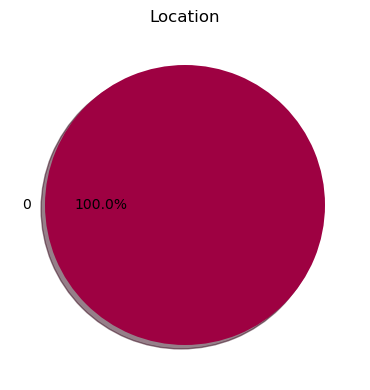

In [41]:
location= india1_2.groupby('Location').agg('count')
labels = location.Value.sort_values().index
counts = location.Value.sort_values()
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Location')
type_show_ids = plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


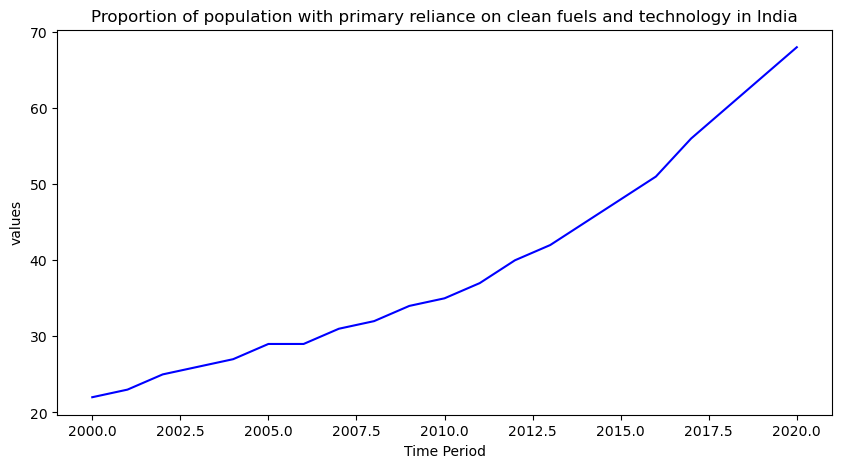

In [42]:
plt.figure(figsize=(10,5))
plt.plot(data12_mean['TimePeriod'],data12_mean['Value'],c='blue')
plt.title("Proportion of population with primary reliance on clean fuels and technology in India")
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()


In [43]:
#Proportion of population with primary reliance on clean fuels and technology in the World


In [44]:
world1_2= data_1_2[(data_1_2.GeoAreaName=="Afghanistan") |
    (data_1_2.GeoAreaName=="Albania") |
    (data_1_2.GeoAreaName=="Algeria") |
    (data_1_2.GeoAreaName=="American Samoa") |
    (data_1_2.GeoAreaName=="Andorra") |
    (data_1_2.GeoAreaName=="Angola") |
    (data_1_2.GeoAreaName=="Antigua and Barbuda") |
    (data_1_2.GeoAreaName=="Azerbaijan") |
    (data_1_2.GeoAreaName=="Argentina") |
    (data_1_2.GeoAreaName=="Australia") |
    (data_1_2.GeoAreaName=="Austria") |
    (data_1_2.GeoAreaName=="Bahamas") |
    (data_1_2.GeoAreaName=="Bahrain") |
    (data_1_2.GeoAreaName=="Bangladesh") |
    (data_1_2.GeoAreaName=="Armenia") |
    (data_1_2.GeoAreaName=="Barbados") |
    (data_1_2.GeoAreaName=="Belgium") |
    (data_1_2.GeoAreaName=="Bermuda") |
    (data_1_2.GeoAreaName=="Bhutan") |
    (data_1_2.GeoAreaName=="Bolivia (Plurinational State of)") |
    (data_1_2.GeoAreaName=="Bosnia and Herzegovina") |
    (data_1_2.GeoAreaName=="Botswana") |
    (data_1_2.GeoAreaName=="Brazil") |
    (data_1_2.GeoAreaName=="Belize") |
    (data_1_2.GeoAreaName=="Solomon Islands") |
    (data_1_2.GeoAreaName=="British Virgin Islands") |
    (data_1_2.GeoAreaName=="Brunei Darussalam") |
    (data_1_2.GeoAreaName=="Bulgaria") |
    (data_1_2.GeoAreaName=="Myanmar") |
    (data_1_2.GeoAreaName=="Burundi") |
    (data_1_2.GeoAreaName=="Belarus") |
    (data_1_2.GeoAreaName=="Cambodia") |
    (data_1_2.GeoAreaName=="Cameroon") |
    (data_1_2.GeoAreaName=="Canada") |
    (data_1_2.GeoAreaName=="Cabo Verde") |
    (data_1_2.GeoAreaName=="Cayman Islands") |
    (data_1_2.GeoAreaName=="Central African Republic") |
    (data_1_2.GeoAreaName=="Sri Lanka") |
    (data_1_2.GeoAreaName=="Chad") |
    (data_1_2.GeoAreaName=="Chile") |
    (data_1_2.GeoAreaName=="China") |
    (data_1_2.GeoAreaName=="Colombia") |
    (data_1_2.GeoAreaName=="Comoros") |
    (data_1_2.GeoAreaName=="Congo") |
    (data_1_2.GeoAreaName=="Democratic Republic of the Congo") |
    (data_1_2.GeoAreaName=="Cook Islands") |
    (data_1_2.GeoAreaName=="Costa Rica") |
    (data_1_2.GeoAreaName=="Croatia") |
    (data_1_2.GeoAreaName=="Cuba") |
    (data_1_2.GeoAreaName=="Cyprus") |
    (data_1_2.GeoAreaName=="Czechia") |
    (data_1_2.GeoAreaName=="Benin") |
    (data_1_2.GeoAreaName=="Denmark") |
    (data_1_2.GeoAreaName=="Dominica") |
    (data_1_2.GeoAreaName=="Dominican Republic") |
    (data_1_2.GeoAreaName=="Ecuador") |
    (data_1_2.GeoAreaName=="El Salvador") |
    (data_1_2.GeoAreaName=="Equatorial Guinea") |
    (data_1_2.GeoAreaName=="Ethiopia") |
    (data_1_2.GeoAreaName=="Eritrea") |
    (data_1_2.GeoAreaName=="Estonia") |
    (data_1_2.GeoAreaName=="Faroe Islands") |
    (data_1_2.GeoAreaName=="Fiji") |
    (data_1_2.GeoAreaName=="Finland") |
    (data_1_2.GeoAreaName=="France") |
    (data_1_2.GeoAreaName=="French Polynesia") |
    (data_1_2.GeoAreaName=="Djibouti") |
    (data_1_2.GeoAreaName=="Gabon") |
    (data_1_2.GeoAreaName=="Georgia") |
    (data_1_2.GeoAreaName=="Gambia") |
    (data_1_2.GeoAreaName=="State of Palestine") |
    (data_1_2.GeoAreaName=="Germany") |
    (data_1_2.GeoAreaName=="Ghana") |
    (data_1_2.GeoAreaName=="Gibraltar") |
    (data_1_2.GeoAreaName=="Kiribati") |
    (data_1_2.GeoAreaName=="Greece") |
    (data_1_2.GeoAreaName=="Greenland") |
    (data_1_2.GeoAreaName=="Grenada") |
    (data_1_2.GeoAreaName=="Guam") |
    (data_1_2.GeoAreaName=="Guatemala") |
    (data_1_2.GeoAreaName=="Guinea") |
    (data_1_2.GeoAreaName=="Guyana") |
    (data_1_2.GeoAreaName=="Haiti") |
    (data_1_2.GeoAreaName=="Honduras") |
    (data_1_2.GeoAreaName=="China, Hong Kong Special Administrative Region") |
    (data_1_2.GeoAreaName=="Hungary") |
    (data_1_2.GeoAreaName=="Iceland") |
    (data_1_2.GeoAreaName=="India") |
    (data_1_2.GeoAreaName=="Indonesia") |
    (data_1_2.GeoAreaName=="Iran (Islamic Republic of)") |
    (data_1_2.GeoAreaName=="Iraq") |
    (data_1_2.GeoAreaName=="Ireland") |
    (data_1_2.GeoAreaName=="Israel") |
    (data_1_2.GeoAreaName=="Italy") |
    (data_1_2.GeoAreaName=="Côte d'Ivoire") |
    (data_1_2.GeoAreaName=="Jamaica") |
    (data_1_2.GeoAreaName=="Japan") |
    (data_1_2.GeoAreaName=="Kazakhstan") |
    (data_1_2.GeoAreaName=="Jordan") |
    (data_1_2.GeoAreaName=="Kenya") |
    (data_1_2.GeoAreaName=="Democratic People's Republic of Korea") |
    (data_1_2.GeoAreaName=="Republic of Korea") |
    (data_1_2.GeoAreaName=="Kuwait") |
    (data_1_2.GeoAreaName=="Kyrgyzstan") |
    (data_1_2.GeoAreaName=="Lao People's Democratic Republic") |
    (data_1_2.GeoAreaName=="Lebanon") |
    (data_1_2.GeoAreaName=="Lesotho") |
    (data_1_2.GeoAreaName=="Latvia") |
    (data_1_2.GeoAreaName=="Liberia") |
    (data_1_2.GeoAreaName=="Libya") |
    (data_1_2.GeoAreaName=="Liechtenstein") |
    (data_1_2.GeoAreaName=="Lithuania") |
    (data_1_2.GeoAreaName=="Luxembourg") |
    (data_1_2.GeoAreaName=="China, Macao Special Administrative Region") |
    (data_1_2.GeoAreaName=="Madagascar") |
    (data_1_2.GeoAreaName=="Malawi") |
    (data_1_2.GeoAreaName=="Malaysia") |
    (data_1_2.GeoAreaName=="Maldives") |
    (data_1_2.GeoAreaName=="Mali") |
    (data_1_2.GeoAreaName=="Malta") |
    (data_1_2.GeoAreaName=="Mauritania") |
    (data_1_2.GeoAreaName=="Mauritius") |
    (data_1_2.GeoAreaName=="Mexico") |
    (data_1_2.GeoAreaName=="Monaco") |
    (data_1_2.GeoAreaName=="Mongolia") |
    (data_1_2.GeoAreaName=="Republic of Moldova") |
    (data_1_2.GeoAreaName=="Montenegro") |
    (data_1_2.GeoAreaName=="Morocco") |
    (data_1_2.GeoAreaName=="Mozambique") |
    (data_1_2.GeoAreaName=="Oman") |
    (data_1_2.GeoAreaName=="Namibia") |
    (data_1_2.GeoAreaName=="Nauru") |
    (data_1_2.GeoAreaName=="Nepal") |
    (data_1_2.GeoAreaName=="Netherlands") |
    (data_1_2.GeoAreaName=="Curaçao") |
    (data_1_2.GeoAreaName=="Aruba") |
    (data_1_2.GeoAreaName=="Sint Maarten (Dutch part)") |
    (data_1_2.GeoAreaName=="New Caledonia") |
    (data_1_2.GeoAreaName=="Vanuatu") |
    (data_1_2.GeoAreaName=="New Zealand") |
    (data_1_2.GeoAreaName=="Nicaragua") |
    (data_1_2.GeoAreaName=="Niger") |
    (data_1_2.GeoAreaName=="Nigeria") |
    (data_1_2.GeoAreaName=="Niue") |
    (data_1_2.GeoAreaName=="Norway") |
    (data_1_2.GeoAreaName=="Northern Mariana Islands") |
    (data_1_2.GeoAreaName=="Micronesia (Federated States of)") |
    (data_1_2.GeoAreaName=="Marshall Islands") |
    (data_1_2.GeoAreaName=="Palau") |
    (data_1_2.GeoAreaName=="Pakistan") |
    (data_1_2.GeoAreaName=="Panama") |
    (data_1_2.GeoAreaName=="Papua New Guinea") |
    (data_1_2.GeoAreaName=="Paraguay") |
    (data_1_2.GeoAreaName=="Peru") |
    (data_1_2.GeoAreaName=="Philippines") |
    (data_1_2.GeoAreaName=="Poland") |
    (data_1_2.GeoAreaName=="Portugal") |
    (data_1_2.GeoAreaName=="Guinea-Bissau") |
    (data_1_2.GeoAreaName=="Timor-Leste") |
    (data_1_2.GeoAreaName=="Puerto Rico") |
    (data_1_2.GeoAreaName=="Qatar") |
    (data_1_2.GeoAreaName=="Romania") |
    (data_1_2.GeoAreaName=="Russian Federation") |
    (data_1_2.GeoAreaName=="Rwanda") |
    (data_1_2.GeoAreaName=="Saint Kitts and Nevis") |
    (data_1_2.GeoAreaName=="Anguilla") |
    (data_1_2.GeoAreaName=="Saint Lucia") |
    (data_1_2.GeoAreaName=="Saint Martin (French Part)") |
    (data_1_2.GeoAreaName=="Saint Vincent and the Grenadines") |
    (data_1_2.GeoAreaName=="San Marino") |
    (data_1_2.GeoAreaName=="Sao Tome and Principe") |
    (data_1_2.GeoAreaName=="Saudi Arabia") |
    (data_1_2.GeoAreaName=="Senegal") |
    (data_1_2.GeoAreaName=="Serbia") |
    (data_1_2.GeoAreaName=="Seychelles") |
    (data_1_2.GeoAreaName=="Sierra Leone") |
    (data_1_2.GeoAreaName=="Singapore") |
    (data_1_2.GeoAreaName=="Slovakia") |
    (data_1_2.GeoAreaName=="Viet Nam") |
    (data_1_2.GeoAreaName=="Slovenia") |
    (data_1_2.GeoAreaName=="Somalia") |
    (data_1_2.GeoAreaName=="South Africa") |
    (data_1_2.GeoAreaName=="Zimbabwe") |
    (data_1_2.GeoAreaName=="Spain") |
    (data_1_2.GeoAreaName=="South Sudan") |
    (data_1_2.GeoAreaName=="Sudan") |
    (data_1_2.GeoAreaName=="Suriname") |
    (data_1_2.GeoAreaName=="Eswatini") |
    (data_1_2.GeoAreaName=="Sweden") |
    (data_1_2.GeoAreaName=="Switzerland") |
    (data_1_2.GeoAreaName=="Syrian Arab Republic") |
    (data_1_2.GeoAreaName=="Tajikistan") |
    (data_1_2.GeoAreaName=="Thailand") |
    (data_1_2.GeoAreaName=="Togo") |
    (data_1_2.GeoAreaName=="Tonga") |
    (data_1_2.GeoAreaName=="Trinidad and Tobago") |
    (data_1_2.GeoAreaName=="United Arab Emirates") |
    (data_1_2.GeoAreaName=="Tunisia") |
    (data_1_2.GeoAreaName=="Türkiye") |
    (data_1_2.GeoAreaName=="Turkmenistan") |
    (data_1_2.GeoAreaName=="Turks and Caicos Islands") |
    (data_1_2.GeoAreaName=="Tuvalu") |
    (data_1_2.GeoAreaName=="Uganda") |
    (data_1_2.GeoAreaName=="Ukraine") |
    (data_1_2.GeoAreaName=="North Macedonia") |
    (data_1_2.GeoAreaName=="Egypt") |
    (data_1_2.GeoAreaName=="United Kingdom of Great Britain and Northern Ireland") |
    (data_1_2.GeoAreaName=="Isle of Man") |
    (data_1_2.GeoAreaName=="United Republic of Tanzania") |
    (data_1_2.GeoAreaName=="United States of America") |
    (data_1_2.GeoAreaName=="United States Virgin Islands") |
    (data_1_2.GeoAreaName=="Burkina Faso") |
    (data_1_2.GeoAreaName=="Uruguay") |
    (data_1_2.GeoAreaName=="Uzbekistan") |
    (data_1_2.GeoAreaName=="Venezuela (Bolivarian Republic of)") |
    (data_1_2.GeoAreaName=="Samoa") |
    (data_1_2.GeoAreaName=="Yemen") |
    (data_1_2.GeoAreaName=="Zambia") |
    (data_1_2.GeoAreaName=="Mayotte") |
    (data_1_2.GeoAreaName=="Falkland Islands (Malvinas)") |
    (data_1_2.GeoAreaName=="French Guiana") |
    (data_1_2.GeoAreaName=="Guadeloupe") |
    (data_1_2.GeoAreaName=="Kosovo") |
    (data_1_2.GeoAreaName=="Martinique") |
    (data_1_2.GeoAreaName=="Montserrat") |
    (data_1_2.GeoAreaName=="Bonaire, Sint Eustatius and Saba") |
    (data_1_2.GeoAreaName=="Réunion") |
    (data_1_2.GeoAreaName=="Saint Helena") |
    (data_1_2.GeoAreaName=="Saint Pierre and Miquelon") |
    (data_1_2.GeoAreaName=="Guernsey") |
    (data_1_2.GeoAreaName=="Jersey") |
    (data_1_2.GeoAreaName=="Wallis and Futuna Islands")
]
data_12_group= world1_2.groupby("TimePeriod")
data_12_mean= data_12_group.mean()
data_12_mean= data_12_mean.reset_index()
data_12_mean.head()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\1136580386.py:235: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_12_mean= data_12_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
0,2000,7.1,432.675258,48.548387,2000.0
1,2001,7.1,432.675258,48.111111,2001.0
2,2002,7.1,432.675258,49.277778,2002.0
3,2003,7.1,432.675258,49.400000,2003.0
4,2004,7.1,432.675258,49.511111,2004.0


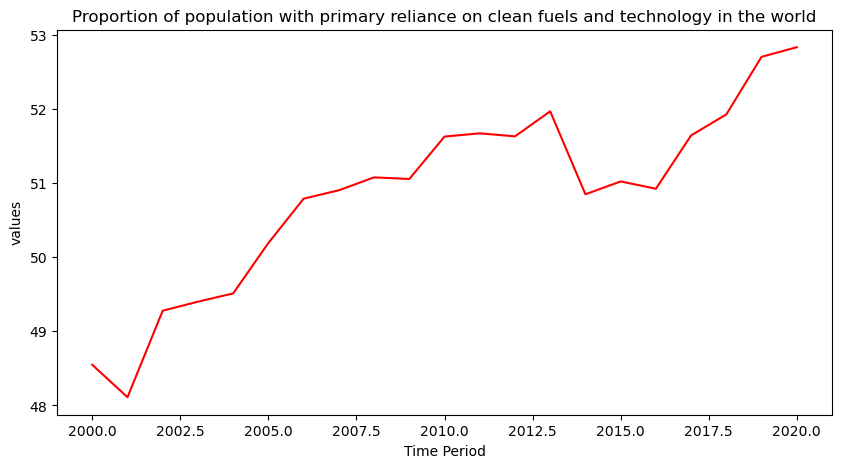

In [45]:
plt.figure(figsize=(10,5))
plt.plot(data_12_mean['TimePeriod'],data_12_mean['Value'],c='red')
plt.title("Proportion of population with primary reliance on clean fuels and technology in the world")
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()


# INDIA VS WORLD

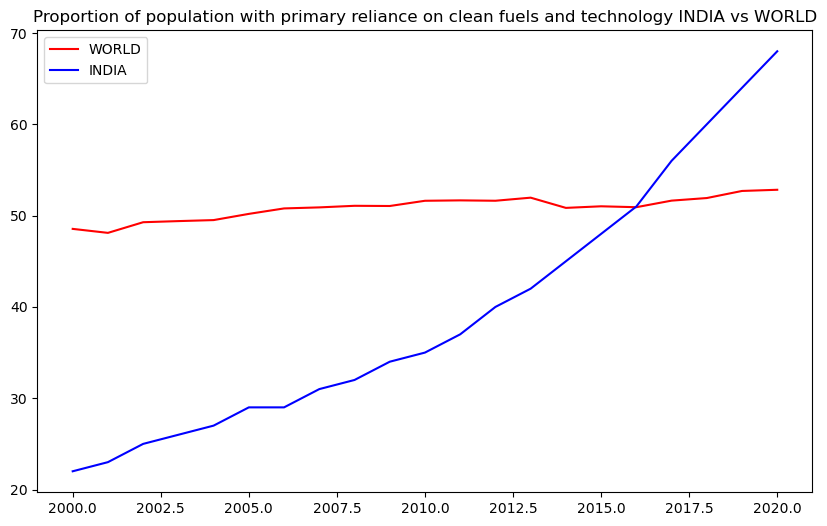

In [46]:
plt.figure(figsize=(10,6))
plt.plot(data_12_mean['TimePeriod'],data_12_mean['Value'], c='red',label='WORLD') #WORLD
plt.plot(data12_mean['TimePeriod'],data12_mean['Value'], c='blue',label='INDIA') #INDIA
plt.title("Proportion of population with primary reliance on clean fuels and technology INDIA vs WORLD")
plt.legend()
plt.show()

In [47]:
con2=data_1_2.groupby("GeoAreaName")
con2=con2.mean()
con2.head()

C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\4147089502.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  con2=con2.mean()


,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
Afghanistan,7.1,4.0,2010.0,19.761905,2010.0
Albania,7.1,8.0,2010.0,63.571429,2010.0
Algeria,7.1,12.0,2010.0,NaN,2010.0
Andorra,7.1,20.0,2010.0,NaN,2010.0
Angola,7.1,24.0,2010.0,44.952381,2010.0


In [48]:
#tTop 5 Countries

top_5_1_2=con2.sort_values("Value", ascending=False)
top_5_1_2.head(5)

,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
Argentina,7.1,32.0,2010.0,95.000000,2010.0
Belarus,7.1,112.0,2010.0,95.000000,2010.0
Saint Vincent and the Grenadines,7.1,670.0,2010.0,94.500000,2010.0
Mauritius,7.1,480.0,2010.0,94.333333,2010.0
Ukraine,7.1,804.0,2010.0,94.047619,2010.0


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\3998071071.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Argentina= Argentina.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\3998071071.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Belarus= Belarus.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\3998071071.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Saint_v_g= Saint_v_g.mean()


Argentina
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.1         32.0   95.0       2000.0
1        2001     7.1         32.0    NaN       2001.0
2        2002     7.1         32.0    NaN       2002.0
3        2003     7.1         32.0    NaN       2003.0
4        2004     7.1         32.0    NaN       2004.0
Belarus
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.1        112.0   95.0       2000.0
1        2001     7.1        112.0    NaN       2001.0
2        2002     7.1        112.0    NaN       2002.0
3        2003     7.1        112.0    NaN       2003.0
4        2004     7.1        112.0    NaN       2004.0
Saint Vincent and the Grenadines
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.1        670.0    NaN       2000.0
1        2001     7.1        670.0    NaN       2001.0
2        2002     7.1        670.0    NaN       2002.0
3        2003     7.1        670.0    NaN       2003.0
4        2004 

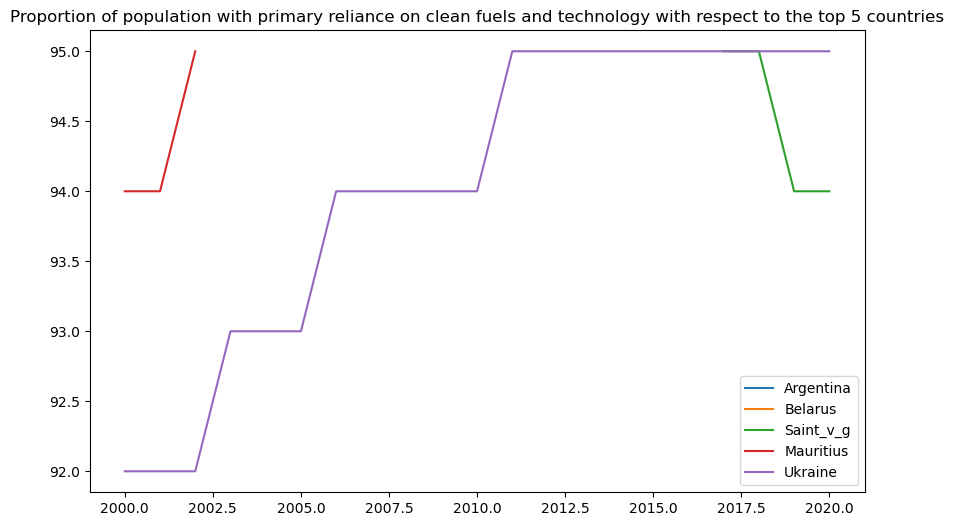

In [49]:
#Argentina
Argentina= data_1_2[(data_1_2.GeoAreaName=="Argentina")]
Argentina= Argentina.groupby("TimePeriod")
Argentina= Argentina.mean()
Argentina= Argentina.reset_index()
print("Argentina")
print(Argentina.head())

#Belarus
Belarus= data_1_2[(data_1_2.GeoAreaName=="Belarus")]
Belarus= Belarus.groupby("TimePeriod")
Belarus= Belarus.mean()
Belarus= Belarus.reset_index()
print("Belarus")
print(Belarus.head())

#Saint Vincent and the Grenadines
Saint_v_g= data_1_2[(data_1_2.GeoAreaName=="Saint Vincent and the Grenadines")]
Saint_v_g= Saint_v_g.groupby("TimePeriod")
Saint_v_g= Saint_v_g.mean()
Saint_v_g= Saint_v_g.reset_index()
print("Saint Vincent and the Grenadines")
print(Saint_v_g.head())

#Mauritius
Mauritius= data_1_2[(data_1_2.GeoAreaName=="Mauritius")]
Mauritius= Mauritius.groupby("TimePeriod")
Mauritius= Mauritius.mean()
Mauritius= Mauritius.reset_index()
print("Mauritius")
print(Mauritius.head())

#Ukraine
Ukraine= data_1_2[(data_1_2.GeoAreaName=="Ukraine")]
Ukraine= Ukraine.groupby("TimePeriod")
Ukraine= Ukraine.mean()
Ukraine= Ukraine.reset_index()
print("Ukraine")
print(Ukraine.head())

top5_1_2=['Argentina','Belarus','Saint_v_g','Mauritius','Ukraine']
plt.figure(figsize=(10,6))
plt.plot(Argentina['TimePeriod'],Argentina['Value'], label ='Argentina')
plt.plot(Belarus['TimePeriod'],Belarus['Value'], label ='Belarus')
plt.plot(Saint_v_g['TimePeriod'],Saint_v_g['Value'], label ='Saint_v_g')
plt.plot(Mauritius['TimePeriod'],Mauritius['Value'], label ='Mauritius')
plt.plot(Ukraine['TimePeriod'],Ukraine['Value'], label ='Ukraine')

plt.legend()
plt.title("Proportion of population with primary reliance on clean fuels and technology with respect to the top 5 countries")
plt.show()

In [50]:
bottom_5_1_2=con2.sort_values("Value", ascending=True)
bottom_5_1_2.head(5)


,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
Libya,7.1,434.0,2010.0,0.0,2010.0
Lebanon,7.1,422.0,2010.0,0.0,2010.0
Bulgaria,7.1,100.0,2010.0,0.0,2010.0
Mozambique,7.1,508.0,2010.0,5.0,2010.0
Chad,7.1,148.0,2010.0,6.0,2010.0


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\1945694474.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Libya= Libya.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\1945694474.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Lebanon= Lebanon.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\1945694474.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Bulgaria= Bulgaria.mean()
C:\Users\d

Libya
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.1        434.0    0.0       2000.0
1        2001     7.1        434.0    0.0       2001.0
2        2002     7.1        434.0    0.0       2002.0
3        2003     7.1        434.0    0.0       2003.0
4        2004     7.1        434.0    0.0       2004.0
Lebanon
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.1        422.0    0.0       2000.0
1        2001     7.1        422.0    0.0       2001.0
2        2002     7.1        422.0    0.0       2002.0
3        2003     7.1        422.0    0.0       2003.0
4        2004     7.1        422.0    0.0       2004.0
Bulgaria
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.1        100.0    0.0       2000.0
1        2001     7.1        100.0    0.0       2001.0
2        2002     7.1        100.0    0.0       2002.0
3        2003     7.1        100.0    0.0       2003.0
4        2004     7.1        100.0    0.0 

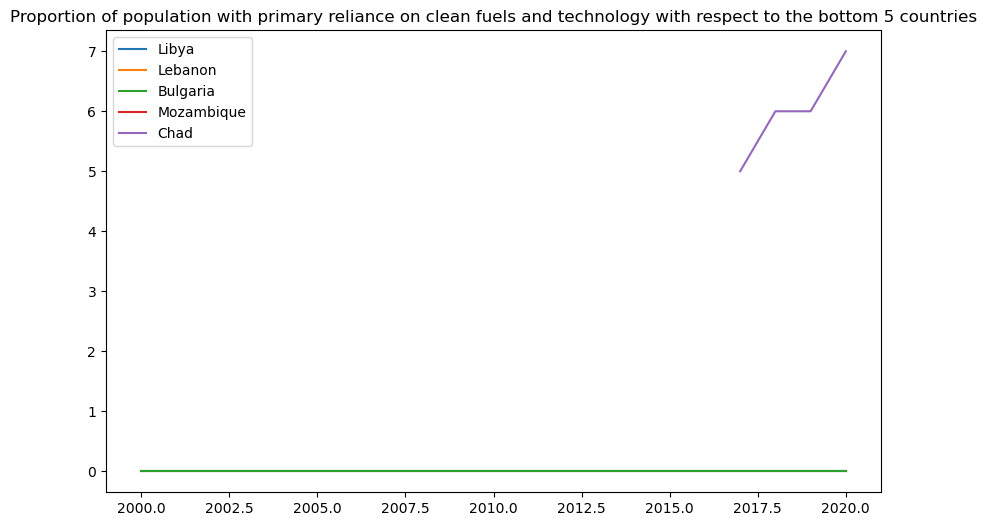

In [51]:
#Libya
Libya= data_1_2[(data_1_2.GeoAreaName=="Libya")]
Libya= Libya.groupby("TimePeriod")
Libya= Libya.mean()
Libya= Libya.reset_index()
print("Libya")
print(Libya.head())

#Lebanon
Lebanon= data_1_2[(data_1_2.GeoAreaName=="Lebanon")]
Lebanon= Lebanon.groupby("TimePeriod")
Lebanon= Lebanon.mean()
Lebanon= Lebanon.reset_index()
print("Lebanon")
print(Lebanon.head())

#Bulgaria
Bulgaria= data_1_2[(data_1_2.GeoAreaName=="Bulgaria")]
Bulgaria= Bulgaria.groupby("TimePeriod")
Bulgaria= Bulgaria.mean()
Bulgaria= Bulgaria.reset_index()
print("Bulgaria")
print(Bulgaria.head())

#Mozambique
Mozambique= data_1_2[(data_1_2.GeoAreaName=="Mozambique")]
Mozambique= Mozambique.groupby("TimePeriod")
Mozambique= Mozambique.mean()
Mozambique= Mozambique.reset_index()
print("Mozambique")
print(Mozambique.head())

#Chad
Chad= data_1_2[(data_1_2.GeoAreaName=="Chad")]
Chad= Chad.groupby("TimePeriod")
Chad= Chad.mean()
Chad= Chad.reset_index()
print("Chad")
print(Chad.head())


plt.figure(figsize=(10,6))
plt.plot(Libya['TimePeriod'],Libya['Value'], label ='Libya')
plt.plot(Lebanon['TimePeriod'],Lebanon['Value'], label ='Lebanon')
plt.plot(Bulgaria['TimePeriod'],Bulgaria['Value'], label ='Bulgaria')
plt.plot(Mozambique['TimePeriod'],Mozambique['Value'], label ='Mozambique')
plt.plot(Chad['TimePeriod'],Chad['Value'], label ='Chad')

plt.legend()
plt.title("Proportion of population with primary reliance on clean fuels and technology with respect to the bottom 5 countries")
plt.show()

# 7.2.1 Renewable energy share in the total final energy consumption (%)

In [52]:
data_2_1= df1[(df1.Indicator=="7.2.1")]
data_2_1.head()

,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,Location,Reporting Type,Units,Nature
17808,7.2,7.2.1,EG_FEC_RNEW,Renewable energy share in the total final ener...,4,Afghanistan,2000,44.99,2000,"Energy Balances, UN Statistics Division (2021)",0,G,PERCENT,E
17809,7.2,7.2.1,EG_FEC_RNEW,Renewable energy share in the total final ener...,4,Afghanistan,2001,45.60,2001,"Energy Balances, UN Statistics Division (2021)",0,G,PERCENT,E
17810,7.2,7.2.1,EG_FEC_RNEW,Renewable energy share in the total final ener...,4,Afghanistan,2002,37.83,2002,"Energy Balances, UN Statistics Division (2021)",0,G,PERCENT,E
17811,7.2,7.2.1,EG_FEC_RNEW,Renewable energy share in the total final ener...,4,Afghanistan,2003,36.66,2003,"Energy Balances, UN Statistics Division (2021)",0,G,PERCENT,E
17812,7.2,7.2.1,EG_FEC_RNEW,Renewable energy share in the total final ener...,4,Afghanistan,2004,44.24,2004,"Energy Balances, UN Statistics Division (2021)",0,G,PERCENT,E


In [53]:
#Proportion of population with renewable energy share in the total final energy consumption in India

In [75]:
india2_1= data_2_1[(data_2_1.GeoAreaName=="India")]
data21_group= india2_1.groupby("TimePeriod")
data21_mean= data21_group.mean()
data21_mean= data21_mean.reset_index()
data21_mean.head()


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2652431779.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data21_mean= data21_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
0,2000,7.2,356.0,46.88,2000.0
1,2001,7.2,356.0,47.11,2001.0
2,2002,7.2,356.0,45.75,2002.0
3,2003,7.2,356.0,45.63,2003.0
4,2004,7.2,356.0,44.92,2004.0


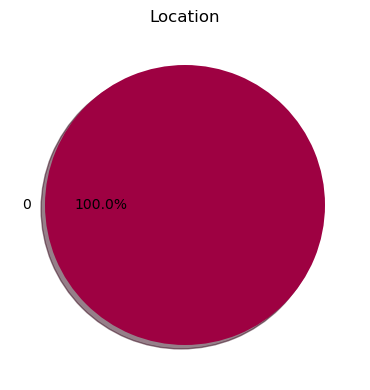

In [55]:
location= india2_1.groupby('Location').agg('count')
labels = location.Value.sort_values().index
counts = location.Value.sort_values()
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,10))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Location')
type_show_ids = plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


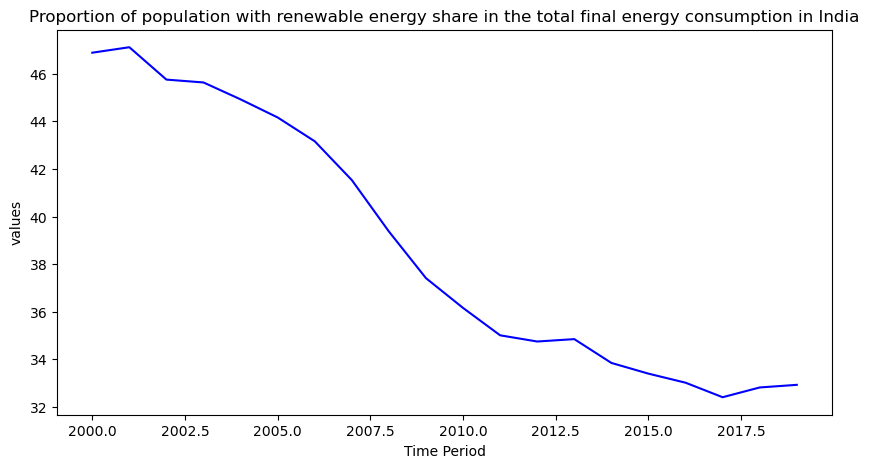

In [56]:
plt.figure(figsize=(10,5))
plt.plot(data21_mean['TimePeriod'],data21_mean['Value'],c='blue')
plt.title("Proportion of population with renewable energy share in the total final energy consumption in India")
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()

In [57]:
#Proportion of population with renewable energy share in the total final energy consumption in the World


In [73]:
world2_1= data_2_1[(data_2_1.GeoAreaName=="Afghanistan") |
    (data_2_1.GeoAreaName=="Albania") |
    (data_2_1.GeoAreaName=="Algeria") |
    (data_2_1.GeoAreaName=="American Samoa") |
    (data_2_1.GeoAreaName=="Andorra") |
    (data_2_1.GeoAreaName=="Angola") |
    (data_2_1.GeoAreaName=="Antigua and Barbuda") |
    (data_2_1.GeoAreaName=="Azerbaijan") |
    (data_2_1.GeoAreaName=="Argentina") |
    (data_2_1.GeoAreaName=="Australia") |
    (data_2_1.GeoAreaName=="Austria") |
    (data_2_1.GeoAreaName=="Bahamas") |
    (data_2_1.GeoAreaName=="Bahrain") |
    (data_2_1.GeoAreaName=="Bangladesh") |
    (data_2_1.GeoAreaName=="Armenia") |
    (data_2_1.GeoAreaName=="Barbados") |
    (data_2_1.GeoAreaName=="Belgium") |
    (data_2_1.GeoAreaName=="Bermuda") |
    (data_2_1.GeoAreaName=="Bhutan") |
    (data_2_1.GeoAreaName=="Bolivia (Plurinational State of)") |
    (data_2_1.GeoAreaName=="Bosnia and Herzegovina") |
    (data_2_1.GeoAreaName=="Botswana") |
    (data_2_1.GeoAreaName=="Brazil") |
    (data_2_1.GeoAreaName=="Belize") |
    (data_2_1.GeoAreaName=="Solomon Islands") |
    (data_2_1.GeoAreaName=="British Virgin Islands") |
    (data_2_1.GeoAreaName=="Brunei Darussalam") |
    (data_2_1.GeoAreaName=="Bulgaria") |
    (data_2_1.GeoAreaName=="Myanmar") |
    (data_2_1.GeoAreaName=="Burundi") |
    (data_2_1.GeoAreaName=="Belarus") |
    (data_2_1.GeoAreaName=="Cambodia") |
    (data_2_1.GeoAreaName=="Cameroon") |
    (data_2_1.GeoAreaName=="Canada") |
    (data_2_1.GeoAreaName=="Cabo Verde") |
    (data_2_1.GeoAreaName=="Cayman Islands") |
    (data_2_1.GeoAreaName=="Central African Republic") |
    (data_2_1.GeoAreaName=="Sri Lanka") |
    (data_2_1.GeoAreaName=="Chad") |
    (data_2_1.GeoAreaName=="Chile") |
    (data_2_1.GeoAreaName=="China") |
    (data_2_1.GeoAreaName=="Colombia") |
    (data_2_1.GeoAreaName=="Comoros") |
    (data_2_1.GeoAreaName=="Congo") |
    (data_2_1.GeoAreaName=="Democratic Republic of the Congo") |
    (data_2_1.GeoAreaName=="Cook Islands") |
    (data_2_1.GeoAreaName=="Costa Rica") |
    (data_2_1.GeoAreaName=="Croatia") |
    (data_2_1.GeoAreaName=="Cuba") |
    (data_2_1.GeoAreaName=="Cyprus") |
    (data_2_1.GeoAreaName=="Czechia") |
    (data_2_1.GeoAreaName=="Benin") |
    (data_2_1.GeoAreaName=="Denmark") |
    (data_2_1.GeoAreaName=="Dominica") |
    (data_2_1.GeoAreaName=="Dominican Republic") |
    (data_2_1.GeoAreaName=="Ecuador") |
    (data_2_1.GeoAreaName=="El Salvador") |
    (data_2_1.GeoAreaName=="Equatorial Guinea") |
    (data_2_1.GeoAreaName=="Ethiopia") |
    (data_2_1.GeoAreaName=="Eritrea") |
    (data_2_1.GeoAreaName=="Estonia") |
    (data_2_1.GeoAreaName=="Faroe Islands") |
    (data_2_1.GeoAreaName=="Fiji") |
    (data_2_1.GeoAreaName=="Finland") |
    (data_2_1.GeoAreaName=="France") |
    (data_2_1.GeoAreaName=="French Polynesia") |
    (data_2_1.GeoAreaName=="Djibouti") |
    (data_2_1.GeoAreaName=="Gabon") |
    (data_2_1.GeoAreaName=="Georgia") |
    (data_2_1.GeoAreaName=="Gambia") |
    (data_2_1.GeoAreaName=="State of Palestine") |
    (data_2_1.GeoAreaName=="Germany") |
    (data_2_1.GeoAreaName=="Ghana") |
    (data_2_1.GeoAreaName=="Gibraltar") |
    (data_2_1.GeoAreaName=="Kiribati") |
    (data_2_1.GeoAreaName=="Greece") |
    (data_2_1.GeoAreaName=="Greenland") |
    (data_2_1.GeoAreaName=="Grenada") |
    (data_2_1.GeoAreaName=="Guam") |
    (data_2_1.GeoAreaName=="Guatemala") |
    (data_2_1.GeoAreaName=="Guinea") |
    (data_2_1.GeoAreaName=="Guyana") |
    (data_2_1.GeoAreaName=="Haiti") |
    (data_2_1.GeoAreaName=="Honduras") |
    (data_2_1.GeoAreaName=="China, Hong Kong Special Administrative Region") |
    (data_2_1.GeoAreaName=="Hungary") |
    (data_2_1.GeoAreaName=="Iceland") |
    (data_2_1.GeoAreaName=="India") |
    (data_2_1.GeoAreaName=="Indonesia") |
    (data_2_1.GeoAreaName=="Iran (Islamic Republic of)") |
    (data_2_1.GeoAreaName=="Iraq") |
    (data_2_1.GeoAreaName=="Ireland") |
    (data_2_1.GeoAreaName=="Israel") |
    (data_2_1.GeoAreaName=="Italy") |
    (data_2_1.GeoAreaName=="Côte d'Ivoire") |
    (data_2_1.GeoAreaName=="Jamaica") |
    (data_2_1.GeoAreaName=="Japan") |
    (data_2_1.GeoAreaName=="Kazakhstan") |
    (data_2_1.GeoAreaName=="Jordan") |
    (data_2_1.GeoAreaName=="Kenya") |
    (data_2_1.GeoAreaName=="Democratic People's Republic of Korea") |
    (data_2_1.GeoAreaName=="Republic of Korea") |
    (data_2_1.GeoAreaName=="Kuwait") |
    (data_2_1.GeoAreaName=="Kyrgyzstan") |
    (data_2_1.GeoAreaName=="Lao People's Democratic Republic") |
    (data_2_1.GeoAreaName=="Lebanon") |
    (data_2_1.GeoAreaName=="Lesotho") |
    (data_2_1.GeoAreaName=="Latvia") |
    (data_2_1.GeoAreaName=="Liberia") |
    (data_2_1.GeoAreaName=="Libya") |
    (data_2_1.GeoAreaName=="Liechtenstein") |
    (data_2_1.GeoAreaName=="Lithuania") |
    (data_2_1.GeoAreaName=="Luxembourg") |
    (data_2_1.GeoAreaName=="China, Macao Special Administrative Region") |
    (data_2_1.GeoAreaName=="Madagascar") |
    (data_2_1.GeoAreaName=="Malawi") |
    (data_2_1.GeoAreaName=="Malaysia") |
    (data_2_1.GeoAreaName=="Maldives") |
    (data_2_1.GeoAreaName=="Mali") |
    (data_2_1.GeoAreaName=="Malta") |
    (data_2_1.GeoAreaName=="Mauritania") |
    (data_2_1.GeoAreaName=="Mauritius") |
    (data_2_1.GeoAreaName=="Mexico") |
    (data_2_1.GeoAreaName=="Monaco") |
    (data_2_1.GeoAreaName=="Mongolia") |
    (data_2_1.GeoAreaName=="Republic of Moldova") |
    (data_2_1.GeoAreaName=="Montenegro") |
    (data_2_1.GeoAreaName=="Morocco") |
    (data_2_1.GeoAreaName=="Mozambique") |
    (data_2_1.GeoAreaName=="Oman") |
    (data_2_1.GeoAreaName=="Namibia") |
    (data_2_1.GeoAreaName=="Nauru") |
    (data_2_1.GeoAreaName=="Nepal") |
    (data_2_1.GeoAreaName=="Netherlands") |
    (data_2_1.GeoAreaName=="Curaçao") |
    (data_2_1.GeoAreaName=="Aruba") |
    (data_2_1.GeoAreaName=="Sint Maarten (Dutch part)") |
    (data_2_1.GeoAreaName=="New Caledonia") |
    (data_2_1.GeoAreaName=="Vanuatu") |
    (data_2_1.GeoAreaName=="New Zealand") |
    (data_2_1.GeoAreaName=="Nicaragua") |
    (data_2_1.GeoAreaName=="Niger") |
    (data_2_1.GeoAreaName=="Nigeria") |
    (data_2_1.GeoAreaName=="Niue") |
    (data_2_1.GeoAreaName=="Norway") |
    (data_2_1.GeoAreaName=="Northern Mariana Islands") |
    (data_2_1.GeoAreaName=="Micronesia (Federated States of)") |
    (data_2_1.GeoAreaName=="Marshall Islands") |
    (data_2_1.GeoAreaName=="Palau") |
    (data_2_1.GeoAreaName=="Pakistan") |
    (data_2_1.GeoAreaName=="Panama") |
    (data_2_1.GeoAreaName=="Papua New Guinea") |
    (data_2_1.GeoAreaName=="Paraguay") |
    (data_2_1.GeoAreaName=="Peru") |
    (data_2_1.GeoAreaName=="Philippines") |
    (data_2_1.GeoAreaName=="Poland") |
    (data_2_1.GeoAreaName=="Portugal") |
    (data_2_1.GeoAreaName=="Guinea-Bissau") |
    (data_2_1.GeoAreaName=="Timor-Leste") |
    (data_2_1.GeoAreaName=="Puerto Rico") |
    (data_2_1.GeoAreaName=="Qatar") |
    (data_2_1.GeoAreaName=="Romania") |
    (data_2_1.GeoAreaName=="Russian Federation") |
    (data_2_1.GeoAreaName=="Rwanda") |
    (data_2_1.GeoAreaName=="Saint Kitts and Nevis") |
    (data_2_1.GeoAreaName=="Anguilla") |
    (data_2_1.GeoAreaName=="Saint Lucia") |
    (data_2_1.GeoAreaName=="Saint Martin (French Part)") |
    (data_2_1.GeoAreaName=="Saint Vincent and the Grenadines") |
    (data_2_1.GeoAreaName=="San Marino") |
    (data_2_1.GeoAreaName=="Sao Tome and Principe") |
    (data_2_1.GeoAreaName=="Saudi Arabia") |
    (data_2_1.GeoAreaName=="Senegal") |
    (data_2_1.GeoAreaName=="Serbia") |
    (data_2_1.GeoAreaName=="Seychelles") |
    (data_2_1.GeoAreaName=="Sierra Leone") |
    (data_2_1.GeoAreaName=="Singapore") |
    (data_2_1.GeoAreaName=="Slovakia") |
    (data_2_1.GeoAreaName=="Viet Nam") |
    (data_2_1.GeoAreaName=="Slovenia") |
    (data_2_1.GeoAreaName=="Somalia") |
    (data_2_1.GeoAreaName=="South Africa") |
    (data_2_1.GeoAreaName=="Zimbabwe") |
    (data_2_1.GeoAreaName=="Spain") |
    (data_2_1.GeoAreaName=="South Sudan") |
    (data_2_1.GeoAreaName=="Sudan") |
    (data_2_1.GeoAreaName=="Suriname") |
    (data_2_1.GeoAreaName=="Eswatini") |
    (data_2_1.GeoAreaName=="Sweden") |
    (data_2_1.GeoAreaName=="Switzerland") |
    (data_2_1.GeoAreaName=="Syrian Arab Republic") |
    (data_2_1.GeoAreaName=="Tajikistan") |
    (data_2_1.GeoAreaName=="Thailand") |
    (data_2_1.GeoAreaName=="Togo") |
    (data_2_1.GeoAreaName=="Tonga") |
    (data_2_1.GeoAreaName=="Trinidad and Tobago") |
    (data_2_1.GeoAreaName=="United Arab Emirates") |
    (data_2_1.GeoAreaName=="Tunisia") |
    (data_2_1.GeoAreaName=="Türkiye") |
    (data_2_1.GeoAreaName=="Turkmenistan") |
    (data_2_1.GeoAreaName=="Turks and Caicos Islands") |
    (data_2_1.GeoAreaName=="Tuvalu") |
    (data_2_1.GeoAreaName=="Uganda") |
    (data_2_1.GeoAreaName=="Ukraine") |
    (data_2_1.GeoAreaName=="North Macedonia") |
    (data_2_1.GeoAreaName=="Egypt") |
    (data_2_1.GeoAreaName=="United Kingdom of Great Britain and Northern Ireland") |
    (data_2_1.GeoAreaName=="Isle of Man") |
    (data_2_1.GeoAreaName=="United Republic of Tanzania") |
    (data_2_1.GeoAreaName=="United States of America") |
    (data_2_1.GeoAreaName=="United States Virgin Islands") |
    (data_2_1.GeoAreaName=="Burkina Faso") |
    (data_2_1.GeoAreaName=="Uruguay") |
    (data_2_1.GeoAreaName=="Uzbekistan") |
    (data_2_1.GeoAreaName=="Venezuela (Bolivarian Republic of)") |
    (data_2_1.GeoAreaName=="Samoa") |
    (data_2_1.GeoAreaName=="Yemen") |
    (data_2_1.GeoAreaName=="Zambia") |
    (data_2_1.GeoAreaName=="Mayotte") |
    (data_2_1.GeoAreaName=="Falkland Islands (Malvinas)") |
    (data_2_1.GeoAreaName=="French Guiana") |
    (data_2_1.GeoAreaName=="Guadeloupe") |
    (data_2_1.GeoAreaName=="Kosovo") |
    (data_2_1.GeoAreaName=="Martinique") |
    (data_2_1.GeoAreaName=="Montserrat") |
    (data_2_1.GeoAreaName=="Bonaire, Sint Eustatius and Saba") |
    (data_2_1.GeoAreaName=="Réunion") |
    (data_2_1.GeoAreaName=="Saint Helena") |
    (data_2_1.GeoAreaName=="Saint Pierre and Miquelon") |
    (data_2_1.GeoAreaName=="Guernsey") |
    (data_2_1.GeoAreaName=="Jersey") |
    (data_2_1.GeoAreaName=="Wallis and Futuna Islands")
]
data_21_group= world2_1.groupby("TimePeriod")
data_21_mean= data_21_group.mean()
data_21_mean= data_21_mean.reset_index()
data_21_mean.tail()


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\1471580738.py:235: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_21_mean= data_21_group.mean()


,TimePeriod,Target,GeoAreaCode,Value,Time_Detail
15,2015,7.2,436.104803,27.341878,2015.0
16,2016,7.2,436.104803,27.113450,2016.0
17,2017,7.2,436.104803,26.940786,2017.0
18,2018,7.2,436.104803,27.055546,2018.0
19,2019,7.2,436.104803,26.835371,2019.0


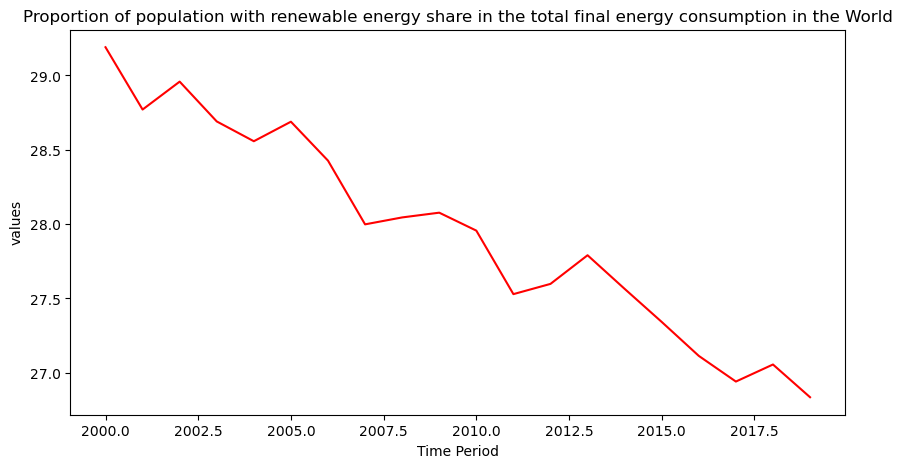

In [59]:
plt.figure(figsize=(10,5))
plt.plot(data_21_mean['TimePeriod'],data_21_mean['Value'],c='red')
plt.title("Proportion of population with renewable energy share in the total final energy consumption in the World")
plt.xlabel("Time Period")
plt.ylabel("values")
plt.show()

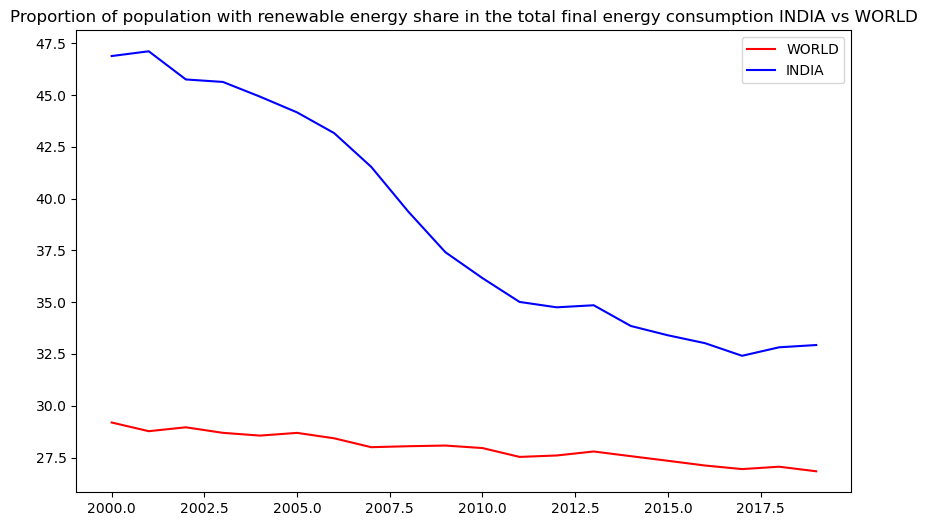

In [60]:
#India Vs World

plt.figure(figsize=(10,6))
plt.plot(data_21_mean['TimePeriod'],data_21_mean['Value'], c='red',label='WORLD') #WORLD
plt.plot(data21_mean['TimePeriod'],data21_mean['Value'], c='blue',label='INDIA') #INDIA
plt.title("Proportion of population with renewable energy share in the total final energy consumption INDIA vs WORLD")
plt.legend()
plt.show()

In [61]:
con3=data_2_1.groupby("GeoAreaName")
con3=con3.mean()
con3.head()


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\767406232.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  con3=con3.mean()


,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
Afghanistan,7.2,4.0,2009.5,25.6805,2009.5
Albania,7.2,8.0,2009.5,37.2360,2009.5
Algeria,7.2,12.0,2009.5,0.2870,2009.5
American Samoa,7.2,16.0,2009.5,0.1310,2009.5
Andorra,7.2,20.0,2009.5,17.6525,2009.5


In [62]:
#Top 5 Countries

top_5_2_1=con3.sort_values("Value", ascending=False)
top_5_2_1.head(5)

,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
Democratic Republic of the Congo,7.2,180.0,2009.5,96.6880,2009.5
Somalia,7.2,706.0,2009.5,93.8005,2009.5
Uganda,7.2,800.0,2009.5,93.0705,2009.5
Ethiopia,7.2,231.0,2009.5,93.0030,2009.5
Burundi,7.2,108.0,2009.5,92.4315,2009.5


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2706386204.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Congo= Congo.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2706386204.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Somalia= Somalia.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2706386204.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Uganda= Uganda.mean()
C:\Users\dhill

Democratic Republic of the Congo
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.2        180.0  97.94       2000.0
1        2001     7.2        180.0  98.34       2001.0
2        2002     7.2        180.0  98.27       2002.0
3        2003     7.2        180.0  97.97       2003.0
4        2004     7.2        180.0  97.88       2004.0
Somalia
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.2        706.0  93.28       2000.0
1        2001     7.2        706.0  93.26       2001.0
2        2002     7.2        706.0  92.58       2002.0
3        2003     7.2        706.0  92.80       2003.0
4        2004     7.2        706.0  93.00       2004.0
Uganda
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.2        800.0  95.01       2000.0
1        2001     7.2        800.0  95.22       2001.0
2        2002     7.2        800.0  95.35       2002.0
3        2003     7.2        800.0  95.28       2003.0
4        2004    

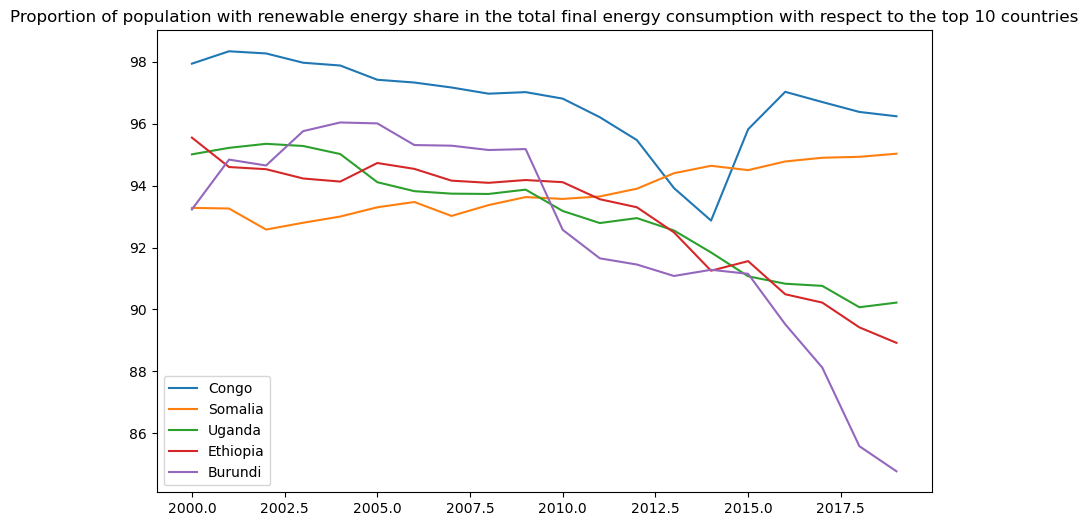

In [63]:
#Democratic Republic of the Congo
Congo= data_2_1[(data_2_1.GeoAreaName=="Democratic Republic of the Congo")]
Congo= Congo.groupby("TimePeriod")
Congo= Congo.mean()
Congo= Congo.reset_index()
print("Democratic Republic of the Congo")
print(Congo.head())

#Somalia
Somalia= data_2_1[(data_2_1.GeoAreaName=="Somalia")]
Somalia= Somalia.groupby("TimePeriod")
Somalia= Somalia.mean()
Somalia= Somalia.reset_index()
print("Somalia")
print(Somalia.head())

#Uganda
Uganda= data_2_1[(data_2_1.GeoAreaName=="Uganda")]
Uganda= Uganda.groupby("TimePeriod")
Uganda= Uganda.mean()
Uganda= Uganda.reset_index()
print("Uganda")
print(Uganda.head())


#Ethiopia
Ethiopia= data_2_1[(data_2_1.GeoAreaName=="Ethiopia")]
Ethiopia= Ethiopia.groupby("TimePeriod")
Ethiopia= Ethiopia.mean()
Ethiopia= Ethiopia.reset_index()
print("Ethiopia")
print(Ethiopia.head())

#Burundi
Burundi= data_2_1[(data_2_1.GeoAreaName=="Burundi")]
Burundi= Burundi.groupby("TimePeriod")
Burundi= Burundi.mean()
Burundi= Burundi.reset_index()
print("Burundi")
print(Burundi.head())

plt.figure(figsize=(10,6))
plt.plot(Congo['TimePeriod'],Congo['Value'], label ='Congo')
plt.plot(Somalia['TimePeriod'],Somalia['Value'], label ='Somalia')
plt.plot(Uganda['TimePeriod'],Uganda['Value'], label ='Uganda')
plt.plot(Ethiopia['TimePeriod'],Ethiopia['Value'], label ='Ethiopia')
plt.plot(Burundi['TimePeriod'],Burundi['Value'], label ='Burundi')

plt.legend()
plt.title("Proportion of population with renewable energy share in the total final energy consumption with respect to the top 10 countries")
plt.show()


In [64]:
#Bottom 5 countries

bottom_5_2_1=con3.sort_values("Value", ascending=True)
bottom_5_2_1.head(5)

,Target,GeoAreaCode,TimePeriod,Value,Time_Detail
GeoAreaName,,,,,
Northern Mariana Islands,7.2,580.0,2009.5,0.0,2009.5
Bahrain,7.2,48.0,2009.5,0.0,2009.5
Gibraltar,7.2,292.0,2009.5,0.0,2009.5
Oman,7.2,512.0,2009.5,0.0,2009.5
Guernsey,7.2,831.0,2009.5,0.0,2009.5


C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2224791222.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Mariana= Mariana.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2224791222.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Bahrain= Bahrain.mean()
C:\Users\dhill\AppData\Local\Temp\ipykernel_16272\2224791222.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Gibraltar= Gibraltar.mean()
C:\U

Northern Mariana Islands
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.2        580.0    0.0       2000.0
1        2001     7.2        580.0    0.0       2001.0
2        2002     7.2        580.0    0.0       2002.0
3        2003     7.2        580.0    0.0       2003.0
4        2004     7.2        580.0    0.0       2004.0
Bahrain
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.2         48.0    0.0       2000.0
1        2001     7.2         48.0    0.0       2001.0
2        2002     7.2         48.0    0.0       2002.0
3        2003     7.2         48.0    0.0       2003.0
4        2004     7.2         48.0    0.0       2004.0
Gibraltar
   TimePeriod  Target  GeoAreaCode  Value  Time_Detail
0        2000     7.2        292.0    0.0       2000.0
1        2001     7.2        292.0    0.0       2001.0
2        2002     7.2        292.0    0.0       2002.0
3        2003     7.2        292.0    0.0       2003.0
4        2004     7.2 

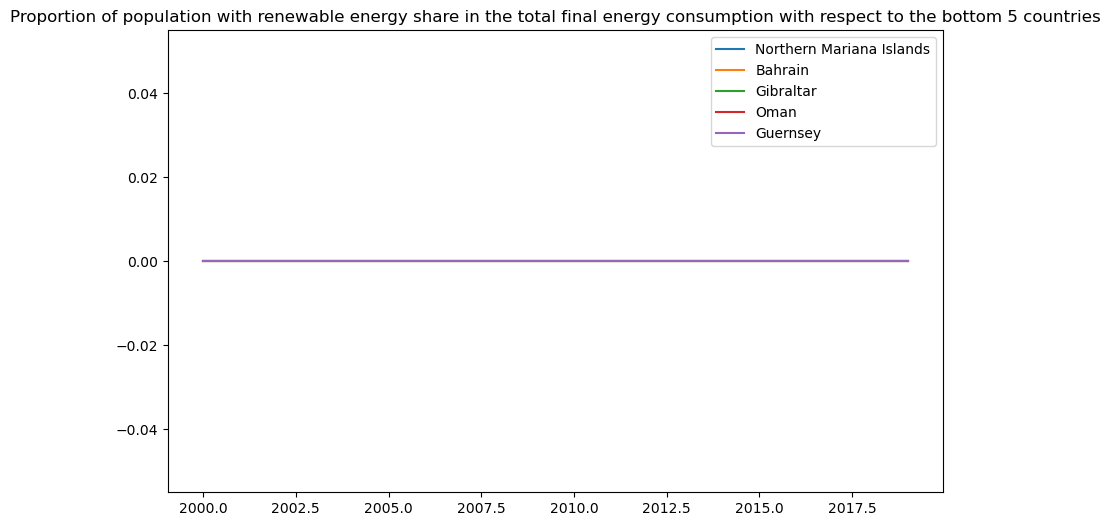

In [65]:
#Northern Mariana Islands
Mariana= data_2_1[(data_2_1.GeoAreaName=="Northern Mariana Islands")]
Mariana= Mariana.groupby("TimePeriod")
Mariana= Mariana.mean()
Mariana= Mariana.reset_index()
print("Northern Mariana Islands")
print(Mariana.head())

#Bahrain
Bahrain= data_2_1[(data_2_1.GeoAreaName=="Bahrain")]
Bahrain= Bahrain.groupby("TimePeriod")
Bahrain= Bahrain.mean()
Bahrain= Bahrain.reset_index()
print("Bahrain")
print(Bahrain.head())

#Gibraltar
Gibraltar= data_2_1[(data_2_1.GeoAreaName=="Gibraltar")]
Gibraltar= Gibraltar.groupby("TimePeriod")
Gibraltar= Gibraltar.mean()
Gibraltar= Gibraltar.reset_index()
print("Gibraltar")
print(Gibraltar.head())


#Oman
Oman= data_2_1[(data_2_1.GeoAreaName=="Oman")]
Oman= Oman.groupby("TimePeriod")
Oman= Oman.mean()
Oman= Oman.reset_index()
print("Oman")
print(Oman.head())

#Guernsey
Guernsey= data_2_1[(data_2_1.GeoAreaName=="Guernsey")]
Guernsey= Guernsey.groupby("TimePeriod")
Guernsey= Guernsey.mean()
Guernsey= Guernsey.reset_index()
print("Guernsey")
print(Guernsey.head())

plt.figure(figsize=(10,6))
plt.plot(Mariana['TimePeriod'],Mariana['Value'], label ='Northern Mariana Islands')
plt.plot(Bahrain['TimePeriod'],Bahrain['Value'], label ='Bahrain')
plt.plot(Gibraltar['TimePeriod'],Gibraltar['Value'], label ='Gibraltar')
plt.plot(Oman['TimePeriod'],Oman['Value'], label ='Oman')
plt.plot(Guernsey['TimePeriod'],Guernsey['Value'], label ='Guernsey')

plt.legend()
plt.title("Proportion of population with renewable energy share in the total final energy consumption with respect to the bottom 5 countries")
plt.show()


Discussion:

'''

The study revealed substantial disparities in electricity access between urban and rural areas in India. The COVID-19 pandemic 
exacerbated these disparities, emphasizing the need for robust and resilient energy infrastructure. While India made progress 
in renewable energy integration, challenges such as grid modernization and energy storage require immediate attention. 
Benchmarking against global peers showcased areas for improvement, while analyzing bottom-performing countries emphasized the 
urgency for international collaboration and support in overcoming challenges.

'''

In [ ]:
Conclusion :

'''
In conclusion, the study highlights the critical need for comprehensive policies addressing urban/rural disparities, ensuring 
energy resilience during crises, and accelerating renewable energy integration. Bridging these gaps requires strategic planning,
investment in infrastructure, and international cooperation to create a more equitable and sustainable energy future for India.

'''

Recommendations :

'''

Invest in Rural Electrification: 
        Prioritize investment in rural areas, focusing on building robust infrastructure and ensuring 
affordability to bridge the urban/rural electricity access gap.

Enhance Energy Resilience:
        Develop contingency plans and invest in smart grid technologies to enhance energy resilience, 
ensuring uninterrupted power supply during crises like the COVID-19 pandemic.

Accelerate Renewable Energy Transition: 
       Increase investments in renewable energy projects, focusing on research and development 
to improve storage technologies and grid integration, ensuring a seamless transition to sustainable energy sources.

International Collaboration: 
       Collaborate with top-performing nations to learn best practices and seek international support for 
addressing challenges faced by bottom-performing countries, fostering a global approach to sustainable energy access.

Community Engagement: 
        Engage local communities through awareness campaigns and capacity-building initiatives, empowering them to
adopt energy-efficient practices and participate in clean energy projects, ensuring sustainable and inclusive development.

'''

Referencs :

'''
1. C.H. Gebara, A. Laurent,
National SDG-7 performance assessment to support achieving sustainable energy for all within planetary limits,
Renewable and Sustainable Energy Reviews,
https://doi.org/10.1016/j.rser.2022.112934.
(https://www.sciencedirect.com/science/article/pii/S1364032122008152)

2. https://data.unicef.org/sdgs/goal-7-affordable-clean-energy/



'''